# Sales Analysis

#### Project Statement:
AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
1) Determine the states that are generating the highest revenues and
2) Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year. 

#### Perform the following steps:
As a data scientist, you must perform the following main steps on the enclosed data.
1.	Data Wrangling
2.	Data Analysis
3.	Data Visualization and
4.	Report Generation

#### 1.	Data Wrangling
* Ensure that the data is clean and that there is no missing or incorrect data. 
         *Inspect the data manually for missing/incorrect data using the functions isna(), and notna().
* Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).
* Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)
* Share your recommendation on the usage of the groupby() function for data chunking or merging.

#### 2.	Data Analysis
* Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.). 
* Determine which group is generating the highest sales, and which group is generating the lowest sales.
* Determine which state is generating the highest sales, and which state is generating the lowest sales.
* Generate weekly, monthly and quarterly reports for the analysis made.
(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)

#### 3.	Data Visualization
* Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like 
    *State-wise sales analysis for different groups (kids, women, men, and   seniors) 
    *Group-wise sales analysis (kids, women, men, and seniors) across different states.
    *Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].
The dashboard must contain daily, weekly, monthly and quarterly charts.
 (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
* Include your recommendation, and indicate why you are choosing the recommended visualization package.

#### 4.	Report Generation 
* Use JupyterLab Notebook for report generation (wrangling, analysis and visualization) Please note that JupyterLab allows you to mix code with graphs and plots etc.
* Use Markdown in suitable places, while presenting your report. 
* The report should contain suitable graphs, plots and analysis reports, and recommendations. Please note that different aspects of analysis demand different graphs/plots. 
    *Use box plot for descriptive statistics
    *Use Seaborn distribution plot for any other statistical plotting.


In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# uploading dataset to python environment
df = pd.read_excel('ausapparalsales4thqrt2020.xlsx')

In [3]:
# Printing the data set first and last rows
print(df.head(5))
print(df.tail(5))

        Date        Time State     Group  Unit  Sales
0 2020-10-01     Morning    WA      Kids     8  20000
1 2020-10-01     Morning    WA       Men     8  20000
2 2020-10-01     Morning    WA     Women     4  10000
3 2020-10-01     Morning    WA   Seniors    15  37500
4 2020-10-01   Afternoon    WA      Kids     3   7500
           Date        Time State     Group  Unit  Sales
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000
7556 2020-12-30     Evening   TAS      Kids    15  37500
7557 2020-12-30     Evening   TAS       Men    15  37500
7558 2020-12-30     Evening   TAS     Women    11  27500
7559 2020-12-30     Evening   TAS   Seniors    13  32500


In [4]:
# displaying number of rows and columns in dataset
df.shape

(7560, 6)

In [5]:
# diplaying the column names
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

### 1.Data wrangling

In [6]:
# checking data types in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [7]:
# Checking if there are any missing values
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [8]:
# displaying the number of unique values in each columns
df.nunique()

Date     90
Time      3
State     7
Group     4
Unit     64
Sales    64
dtype: int64

In [9]:
# Displaying unique values and it's counts in each column
col=['Time', 'State', 'Group', 'Unit']

for i in col:
    vc=df[i].value_counts()
    vc=pd.DataFrame(vc)
    print(i,vc)

Time             count
Time             
 Morning     2520
 Afternoon   2520
 Evening     2520
State        count
State       
 WA     1080
 NT     1080
 SA     1080
 VIC    1080
 QLD    1080
 NSW    1080
 TAS    1080
Group           count
Group          
 Kids      1890
 Men       1890
 Women     1890
 Seniors   1890
Unit       count
Unit       
9       406
10      402
6       370
8       369
7       362
...     ...
53        9
61        9
54        9
60        7
58        5

[64 rows x 1 columns]


In [10]:
# checking for duplicate data
df.duplicated().sum()

0

As of now there is no discrepancy or missing values in dataset so far.

#### Scaling

In [11]:
# saving the dataset to new file for preprocessing
data = df
data1 = data.drop(['Date', 'Time', 'State', 'Group', 'Unit'],axis=1)
data1.head(3)

Sales
0  20000
1  20000
2  10000

In [12]:
# scaling sales column
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,100))
data1=min_max_scaler.fit_transform(data1)
data1 = pd.DataFrame(data1,columns=['Sales'])

In [13]:
# saving the scaled column to th dataset
data=data.drop(['Sales'],axis=1)
data=pd.concat([data,data1],axis=1)
data.head()

Date        Time State     Group  Unit      Sales
0 2020-10-01     Morning    WA      Kids     8   9.523810
1 2020-10-01     Morning    WA       Men     8   9.523810
2 2020-10-01     Morning    WA     Women     4   3.174603
3 2020-10-01     Morning    WA   Seniors    15  20.634921
4 2020-10-01   Afternoon    WA      Kids     3   1.587302

Min Max scaling is used to restrict the sales values comparable with units value.

#### Encoding

In [14]:
# label encoding categorical features
lable_encd=preprocessing.LabelEncoder()
cols =['Time','State','Group']
for i in cols:
    data[i] =lable_encd.fit_transform(data[i])

data.head()

Date  Time  State  Group  Unit      Sales
0 2020-10-01     2      6      0     8   9.523810
1 2020-10-01     2      6      1     8   9.523810
2 2020-10-01     2      6      3     4   3.174603
3 2020-10-01     2      6      2    15  20.634921
4 2020-10-01     0      6      0     3   1.587302

I chose label encoding so that the dimension of the dataset is not effected.

### 2.Data Analysis

In [15]:
# Checking the first and last date recorded in data set
print("The satrting date is :", df['Date'].min())
print("The ending date is :", df['Date'].max())

The satrting date is : 2020-10-01 00:00:00
The ending date is : 2020-12-30 00:00:00


We have the sales records from 1st October 2020 till 30th December 2020.

In [16]:
# Creating a new dataset that contains only the numerical columns
numeric_data = df.select_dtypes(include=[np.number])
# Creating a new dataset that contains only the categorical columns
categorical_data = df.select_dtypes(include=[object])

In [17]:
#descriptive statistical analysis of numerical columns
numeric_data.describe()

Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000

There are two numerical columns in the given dats set: unit and sales. There are 7560 observations in each column. The average number of units soled across all states, for all groups for entire recorded time period is about 18 units , the mininum number of units sold is 2 and the maximum value is 65.The standard deviation of number of units sold is about 12.9. The mininum sales value recorded is about 5000, maximum is 162500 and the average sales is about 45013.55. The standard deviation of sales is 32253.5.

In [18]:
# descriptive statistical analysis of categorical columns
categorical_data.describe()

Time State  Group
count       7560  7560   7560
unique         3     7      4
top      Morning    WA   Kids
freq        2520  1080   1890

There are three categorical columns in the given data set : time, state, group. There are 7560 observations in each column. In time there are 3 unique categories : morning, afternoon and evening. All of the three categories have same frequency 2520, we saw it in earlier analysis. State column have 7 unique values : WA, NT, SA, VIC, QLD, NSW and TAS, we already saw that all of them have equal frequency of occurence 1080. In group column there are 4 distinct categories :  Kids, Men, Women, and Seniors, similar too other categorical columns all them also have same frequency 1890.

#### ? Determine which group is generating the highest sales, and which group is generating the lowest sales.

In [20]:
# creating a table for sales from different groups
group_sales = df.groupby('Group').agg({'Sales':['min','max','mean']})
group_sales

Sales                      
           min     max          mean
Group                               
 Kids     5000  162500  45011.904762
 Men      5000  160000  45370.370370
 Seniors  5000  162500  44464.285714
 Women    5000  162500  45207.671958

* From the above table we understand that the minimum sales across all categories is same and the values is 5000.
* For kids category the maximum sales value is 162500 and the average is 45011.9
* For Men the maximum sales value is 160000 and the average value is 45370.37
* For Seniors the maximum vale is 162500 and the average value is 44464.28
* For women the maximum value is 162500 and the average value is 45207.67

In [21]:
# creating a table for finding the total sales of each group
g_sales = df.groupby('Group')['Sales'].sum()
g_sales.sort_values(ascending=True)

Group
 Seniors    84037500
 Kids       85072500
 Women      85442500
 Men        85750000
Name: Sales, dtype: int64

From the above table it's clear that Mens generate maximum sales value, which is 85750000. Seniors generate the least sales value, which is 84037500.

#### ? Determine which state is generating the highest sales, and which state is generating the lowest sales.

In [22]:
# creating a table for sales for each state
state_sales =df.groupby('State')['Sales'].sum()
state_sales.sort_values(ascending=True)

State
 WA      22152500
 NT      22580000
 TAS     22760000
 QLD     33417500
 SA      58857500
 NSW     74970000
 VIC    105565000
Name: Sales, dtype: int64

From the above table we can conclude that WA state generate lowest sales, the value is 22152500. And VIC generate the highest sales, which is 105565000.

#### ? Generate weekly, monthly and quarterly reports for the analysis made.

In [23]:
# Creating a table for daily sales and resampling it to get the weekly sales data
daily_sales = df.groupby(['Date'])['Sales'].sum()
weekly_sales= daily_sales.resample('W').sum()
print("Weekly Sales for 4th Quarter")
weekly_sales

Weekly Sales for 4th Quarter


Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

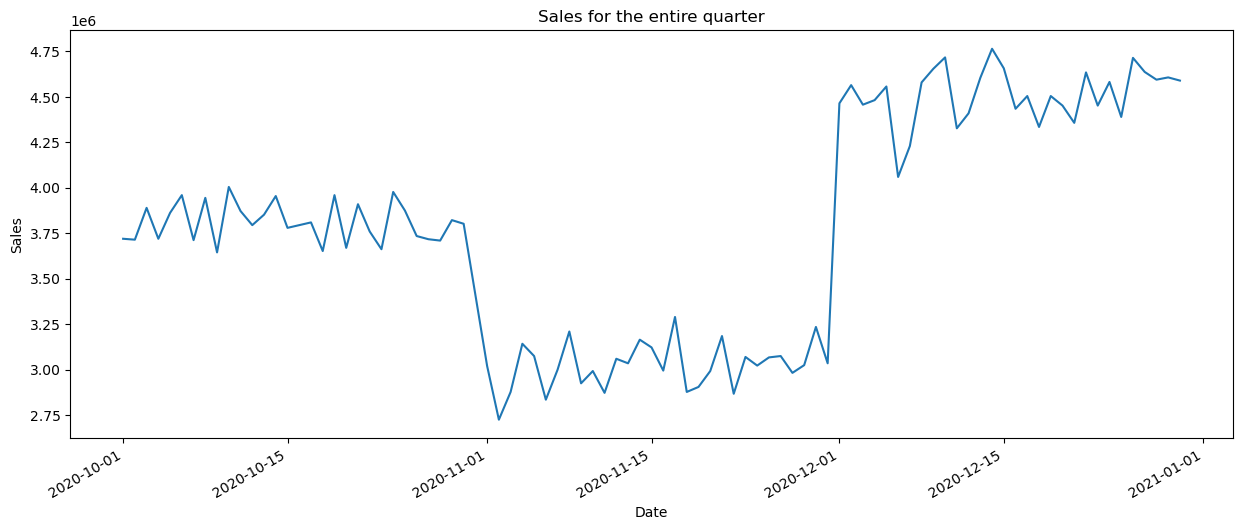

In [24]:
# ploting the sales for the entire quarter
daily_sales.plot(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales for the entire quarter')
plt.show()

Entire November recorded the lowest values for sales. In December there is a sharp increase in sales and the month have highest sales values in the quarter. The higher value in sales in December may be due to Christmas season.

In [25]:
# resampling the daily sales data to get monthly sales
monthly_sales = daily_sales.resample('M').sum()
print("Total sales for each month in 4th quarter")
monthly_sales

Total sales for each month in 4th quarter


Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64

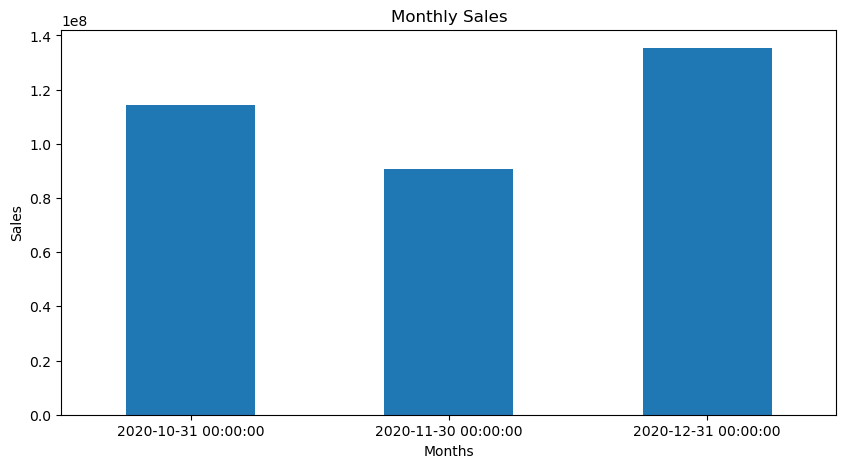

In [26]:
# ploting the sales for the entire quarter
monthly_sales.plot(kind = 'bar',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=0)
plt.show()

As explained above December have highest sales and November have the lowest sales.

In [27]:
# resampling the daily sales data to get the quarterly sales
quarterly_sales = daily_sales.resample('Q').sum()
quarterly_sales

Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64

Total quarterly sales is 340302500.

In [28]:
# creating a table of daily sales for different groups
daily_sales_group = df.groupby(['Date','Group'])['Sales'].sum()
daily_sales_group

Date        Group   
2020-10-01   Kids        972500
             Men         867500
             Seniors     995000
             Women       885000
2020-10-02   Kids        922500
                         ...   
2020-12-29   Women      1080000
2020-12-30   Kids       1132500
             Men        1130000
             Seniors    1177500
             Women      1150000
Name: Sales, Length: 360, dtype: int64

In [29]:
# Using unstack to get daily sales for each group for everyday
dsg = daily_sales_group.unstack()
print("Daily sales for each groups in 4th quarter")
dsg

Daily sales for each groups in 4th quarter


Group          Kids      Men   Seniors    Women
Date                                           
2020-10-01   972500   867500    995000   885000
2020-10-02   922500  1015000    882500   895000
2020-10-03   950000   945000    900000  1095000
2020-10-04   845000   902500   1005000   967500
2020-10-05  1070000   985000    987500   820000
...             ...      ...       ...      ...
2020-12-26  1155000  1255000   1115000  1190000
2020-12-27  1025000  1217500   1167500  1227500
2020-12-28  1172500  1127500   1075000  1220000
2020-12-29  1227500  1145000   1155000  1080000
2020-12-30  1132500  1130000   1177500  1150000

[90 rows x 4 columns]

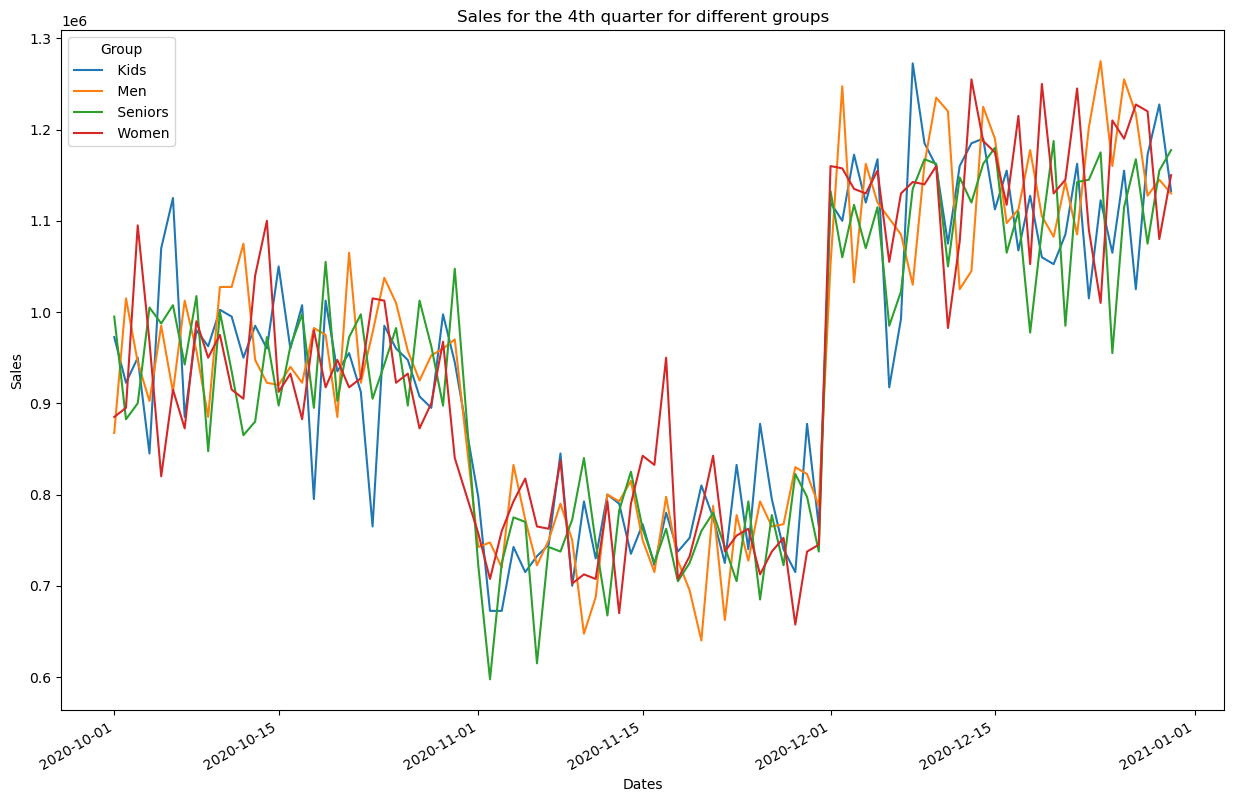

In [30]:
#Plotting the daily sales for different groups in 4th quarter
dsg.plot(figsize=(15,10))
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.title('Sales for the 4th quarter for different groups')
plt.show()

From the above plot we can say that mostly seniors and kids group have lowest sales, while mens and womens group have highest values. As seen earlier, in November the sales drops and in December sales increases sharply for different groups. Eventhough the daily sales may fluctuates, this trend remains the same for each category.

In [31]:
# Resampling the daily sales for getting the weekly sales for diffrent groups
weekly_dsg= dsg.resample('W').sum()
print("Weekly sales for different groups in 4th quarter")
weekly_dsg

Weekly sales for different groups in 4th quarter


Group          Kids      Men   Seniors    Women
Date                                           
2020-10-04  3690000  3730000   3782500  3842500
2020-10-11  7020000  6807500   6737500  6437500
2020-10-18  6707500  6710000   6470000  6752500
2020-10-25  6525000  6872500   6757500  6660000
2020-11-01  5490000  5507500   5540000  5270000
2020-11-08  5125000  5335000   4962500  5442500
2020-11-15  5315000  5242500   5397500  5217500
2020-11-22  5302500  5025000   5200000  5585000
2020-11-29  5577500  5482500   5302500  5115000
2020-12-06  7362500  7505000   7217500  7537500
2020-12-13  8030000  7802500   7805000  7887500
2020-12-20  7765000  7990000   7772500  8127500
2020-12-27  7630000  8337500   7685000  8117500
2021-01-03  3532500  3402500   3407500  3450000

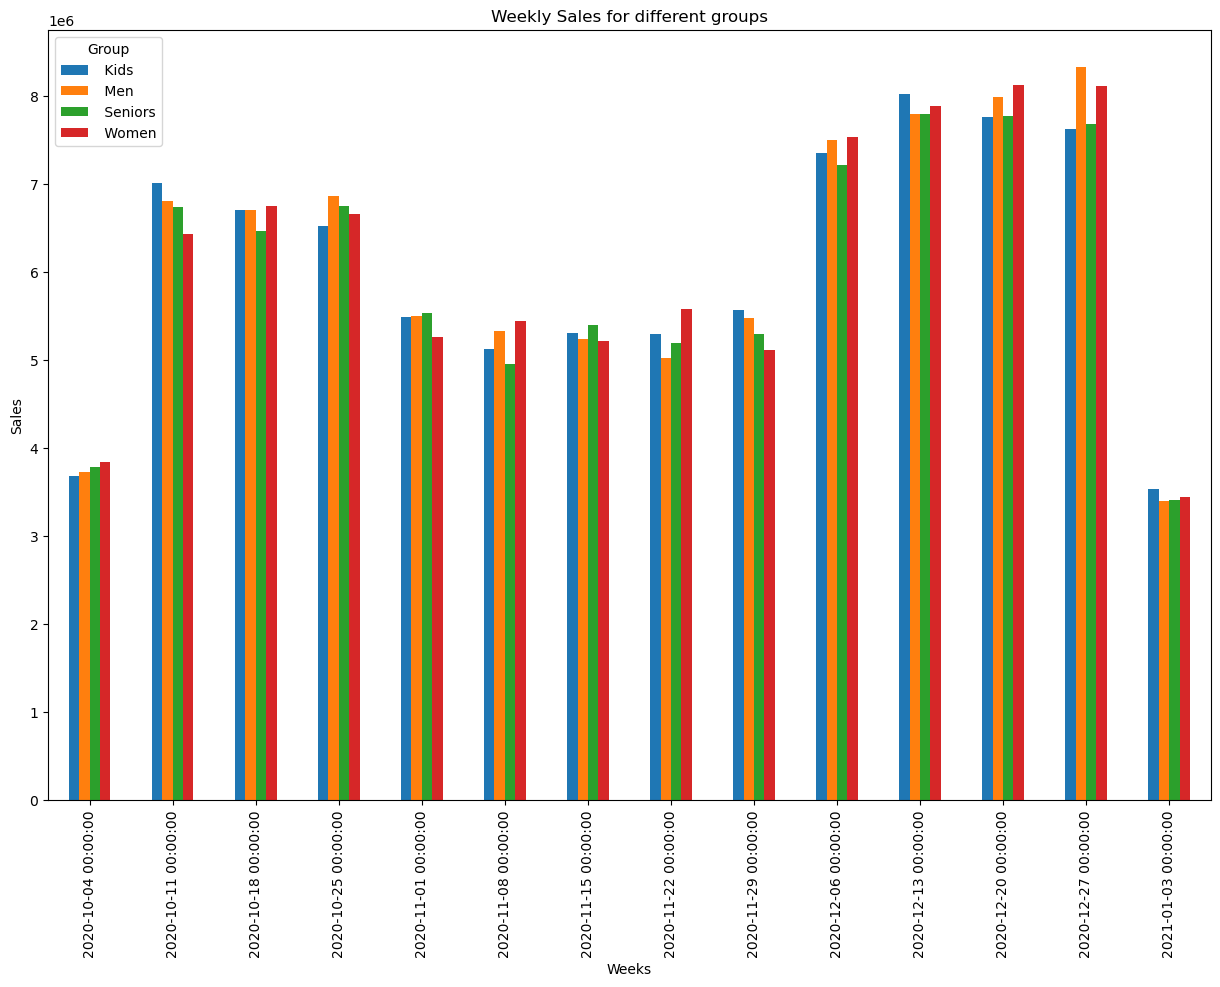

In [32]:
#plotting weekly sales for different groups in 4th quarter
weekly_dsg.plot(kind='bar', figsize=(15,10))
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.title('Weekly Sales for different groups')
plt.show()

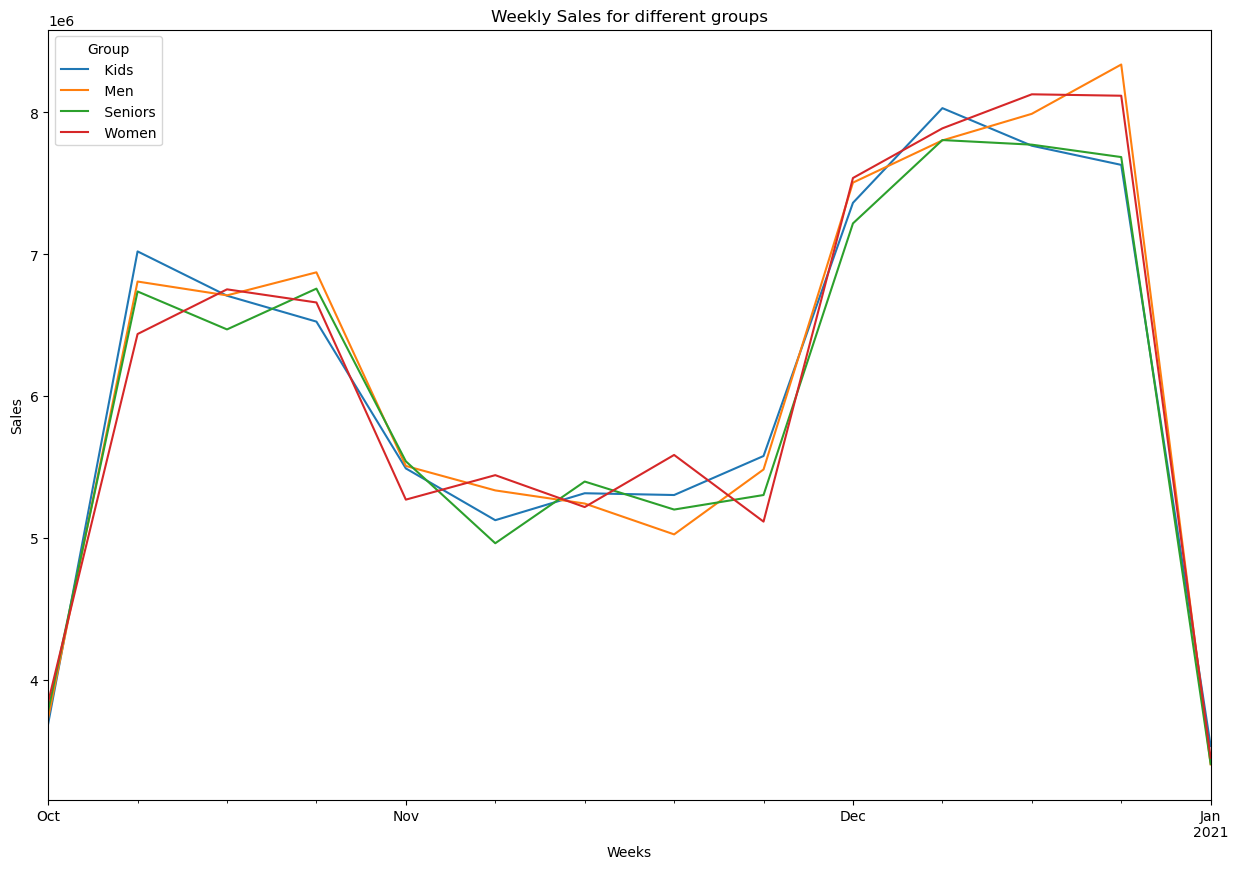

In [33]:
weekly_dsg.plot( figsize=(15,10))
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.title('Weekly Sales for different groups')
plt.show()

The last week of December records the lowest sales for every group. Among the groups mens have the least and kids have the highest sales in this particular week. The first week of october records the second lowest sales for every group.And among thee groups kids have the least and womens have the most sales value. From second week of December the sales for every group increases sharply and attains highest values in the second last week of December. And among that mens have the highest and kids have the lowest sales values. In every week the sales value of different groups may vary, but still trend in sales remains the same for the quarter.

In [34]:
# Resampling the daily sales for getting the monthly sales for diffrent groups
monthly_dsg = dsg.resample('M').sum()
print("Monthly sales for each group in 4th quarter")
monthly_dsg

Monthly sales for each group in 4th quarter


Group           Kids       Men   Seniors     Women
Date                                              
2020-10-31  28635000  28885000  28565000  28205000
2020-11-30  22882500  22615000  22322500  22862500
2020-12-31  33555000  34250000  33150000  34375000

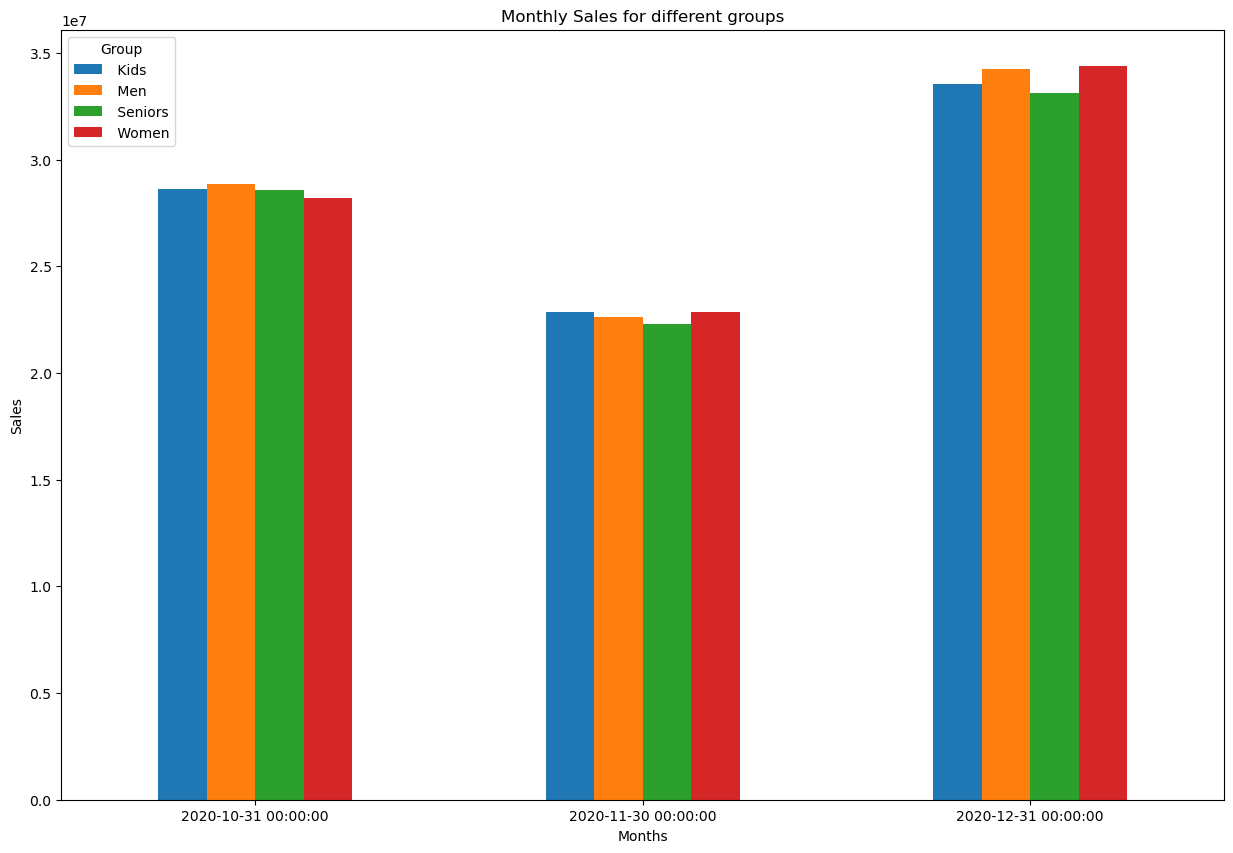

In [35]:
#plotting monthly sales for each group in 4th quarter
monthly_dsg.plot(kind='bar', figsize=(15,10))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales for different groups')
plt.xticks(rotation=0)
plt.show()

In November seniors have the lowest sales and women have the highest sales. So the Seniors in November have the lowest sales in the entire quarter. In December womens have the highest sales, so in the entire quarter womens have the highest sales. In December seniors have the lowest sales. In october all 4 categories have almost equal sales, among them mens have slightly more sales.

In [36]:
# Resampling the daily sales for getting the quarterly sales for diffrent groups
quarterly_dsg = dsg.resample('Q').sum()
print("Total sales for each group in 4th quarter")
quarterly_dsg

Total sales for each group in 4th quarter


Group           Kids       Men   Seniors     Women
Date                                              
2020-12-31  85072500  85750000  84037500  85442500

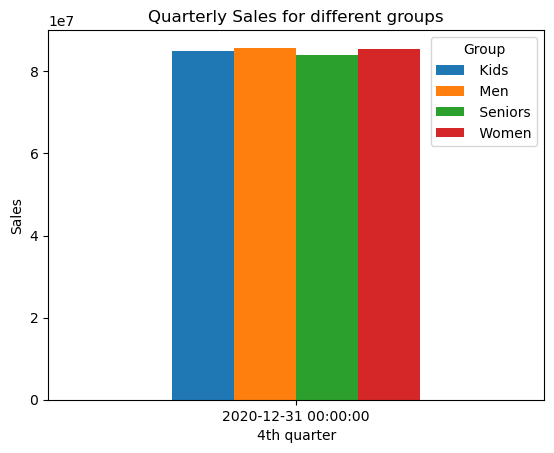

In [37]:
# plotting the quarterly sales for each group
quarterly_dsg.plot(kind='bar')
plt.xlabel('4th quarter')
plt.ylabel('Sales')
plt.title('Quarterly Sales for different groups')
plt.xticks(rotation=0)
plt.show()

For the entire quarter mens have the highest sales, while seniors have the lowest sales. Almost similar sales in entire quarter inticates that the lower sales for differnt days are compensated with higher sales for other days for all categories.

In [38]:
# creating a table of daily sales for different states and unstacking it
daily_sales_state = df.groupby(['Date','State'])['Sales'].sum()
dss = daily_sales_state.unstack()
print("Daily sales for each state ")
dss

Daily sales for each state 


State           NSW      NT     QLD      SA     TAS      VIC      WA
Date                                                                
2020-10-01   877500  260000  397500  630000  232500  1060000  262500
2020-10-02   850000  292500  337500  610000  250000  1120000  255000
2020-10-03   810000  257500  417500  695000  265000  1205000  240000
2020-10-04   845000  242500  475000  607500  305000   970000  275000
2020-10-05   815000  250000  360000  775000  277500  1105000  280000
...             ...     ...     ...     ...     ...      ...     ...
2020-12-26  1027500  275000  510000  797500  305000  1522500  277500
2020-12-27   910000  302500  515000  837500  272500  1495000  305000
2020-12-28   967500  302500  540000  675000  322500  1507500  280000
2020-12-29   992500  305000  460000  787500  327500  1430000  305000
2020-12-30  1010000  325000  460000  850000  352500  1252500  340000

[90 rows x 7 columns]

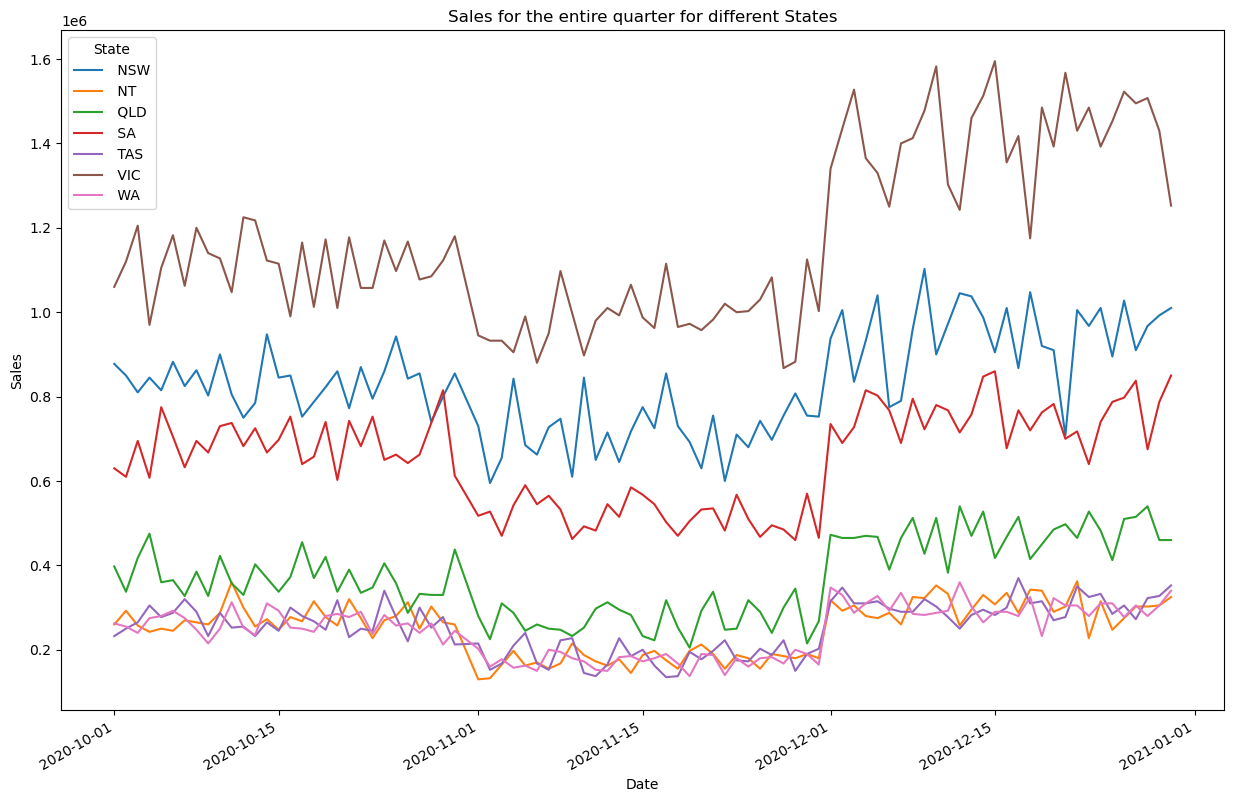

In [39]:
# plotting the daily sales for each state
dss.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales for the entire quarter for different States')
plt.show()

The same trend observed earlier for sales is also seen here. Among different states VIC have the highest sales for the entire quarter and the values are nearly 50% more than that of NSW, which comes second. NT, TAS and WA have the lowest sales values compared to other states. And among these three the values fluctuates on a daily basis. QLD have slightly larger values comapred with the last three. SA have sales values nearly 50% less than NSW.

In [40]:
# Resampling the daily sales for getting the weekly sales for diffrent states
weekly_dss= dss.resample('W').sum()
print("Weekly sales for different states")
weekly_dss

Weekly sales for different states


State           NSW       NT      QLD       SA      TAS       VIC       WA
Date                                                                      
2020-10-04  3382500  1052500  1627500  2542500  1052500   4355000  1032500
2020-10-11  5892500  1937500  2545000  4942500  1947500   7865000  1872500
2020-10-18  5717500  1935000  2637500  4822500  1845000   7847500  1835000
2020-10-25  5922500  1907500  2592500  4832500  1907500   7742500  1910000
2020-11-01  4822500  1520000  1997500  3987500  1477500   6577500  1425000
2020-11-08  4915000  1150000  1825000  3772500  1312500   6687500  1202500
2020-11-15  4957500  1247500  1905000  3650000  1287500   6930000  1195000
2020-11-22  4987500  1282500  1875000  3572500  1227500   6975000  1192500
2020-11-29  5147500  1267500  1957500  3555000  1300000   6990000  1260000
2020-12-06  6277500  1937500  2997500  5002500  2097500   9250000  2060000
2020-12-13  6807500  2145000  3310000  5227500  2012500   9877500  2145000
2020-12-20  6647500  2232500  3277500  5417500  2142500   9932500  2005000
2020-12-27  6522500  2032500  3410000  5220000  2147500  10345000  2092500
2021-01-03  2970000   932500  1460000  2312500  1002500   4190000   925000

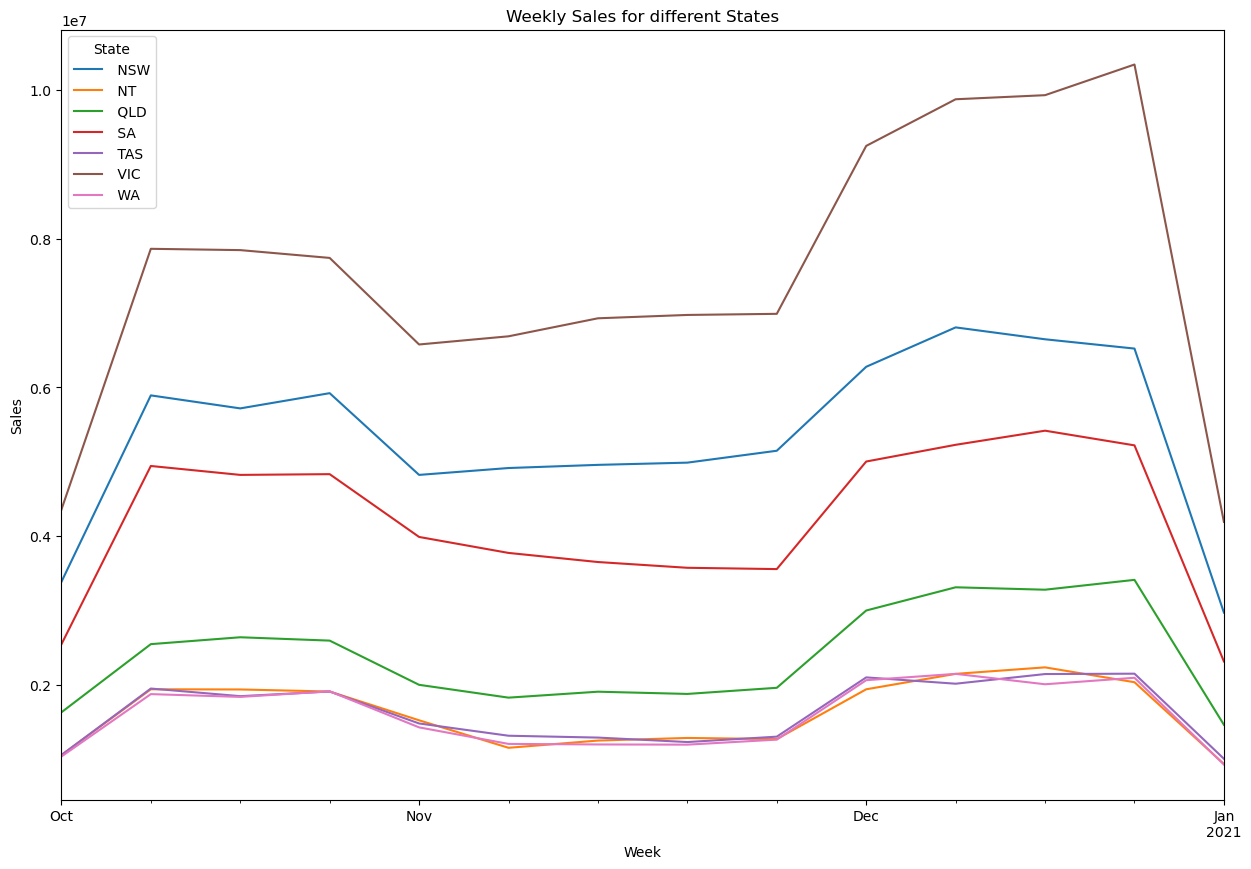

In [41]:
#plotting the weekly sales for different states
weekly_dss.plot(figsize=(15,10))
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Weekly Sales for different States')
plt.show()

When we analyse this plot the trend we observed earlier becomes more clearer.

In [42]:
# Resampling the daily sales for getting the monthly sales for diffrent groups
monthly_dss = dss.resample('M').sum()
print("Monthly sales of different states")
monthly_dss

Monthly sales of different states


State            NSW       NT       QLD        SA      TAS       VIC       WA
Date                                                                         
2020-10-31  25007500  8222500  11120000  20610000  8015000  33442500  7872500
2020-11-30  21490000  5257500   8110000  15532500  5545000  29530000  5217500
2020-12-31  28472500  9100000  14187500  22715000  9200000  42592500  9062500

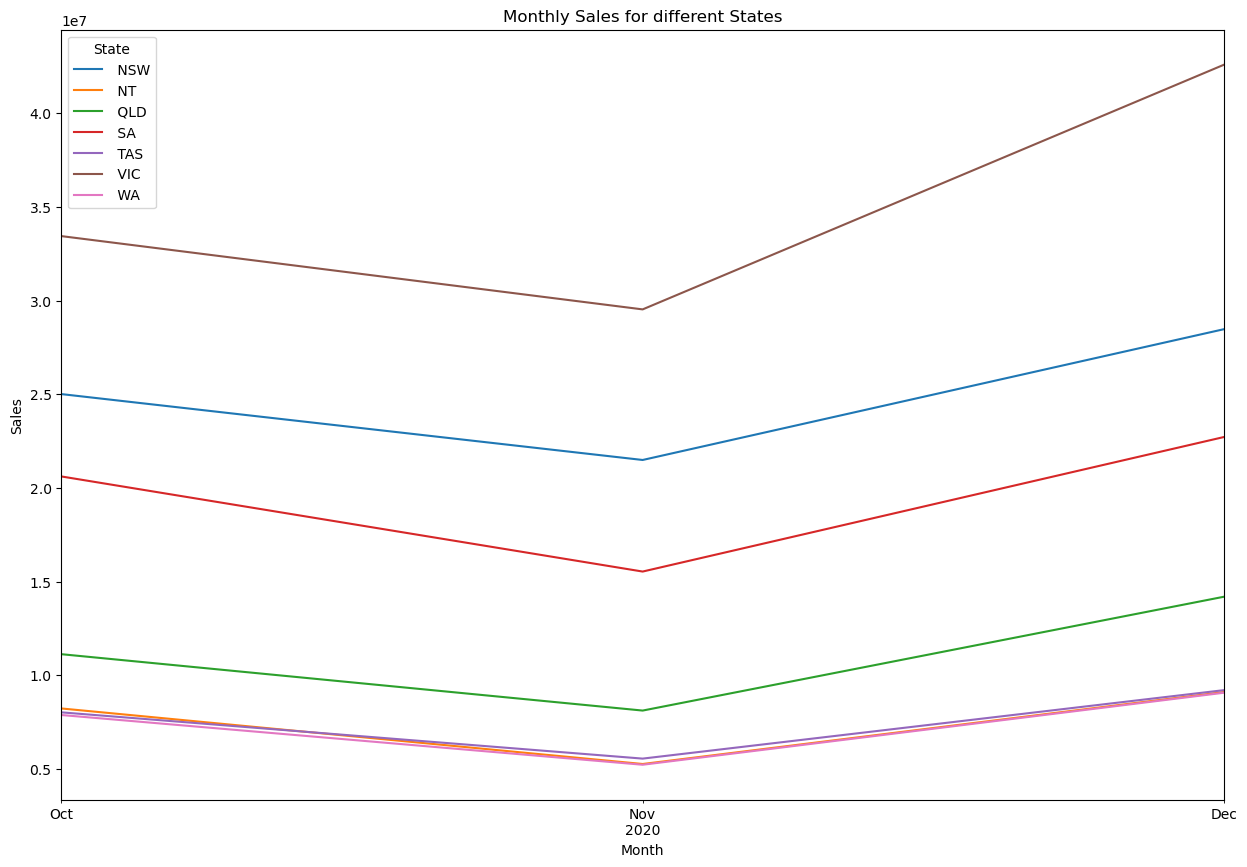

In [43]:
# plotting the monthly sales of states
monthly_dss.plot(figsize=(15,10))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales for different States')
plt.show()

From the above plot we can say that during mid November WA have the lowest sales among all states for the entire quarter. At the end of December VIC have the highest sales among all states for the entire quarter.

In [44]:
# Resampling the daily sales for getting the quarterly sales for diffrent groups
quarterly_dss = dss.resample('Q').sum()
print("Total quarterly sales for each state")
quarterly_dss

Total quarterly sales for each state


State            NSW        NT       QLD        SA       TAS        VIC  \
Date                                                                      
2020-12-31  74970000  22580000  33417500  58857500  22760000  105565000   

State             WA  
Date                  
2020-12-31  22152500

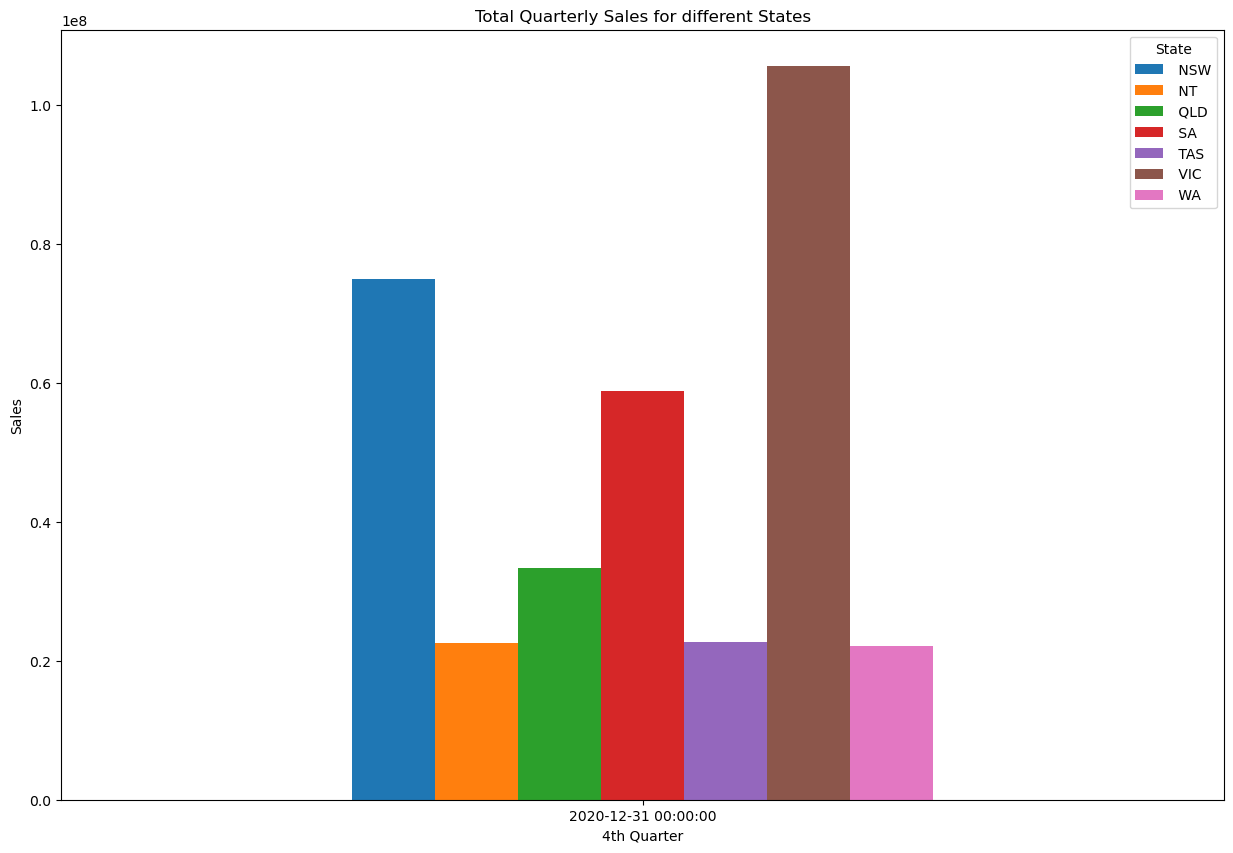

In [45]:
# plotting the quarterly sales of each state
quarterly_dss.plot(kind='bar', figsize=(15,10))
plt.xlabel('4th Quarter')
plt.ylabel('Sales')
plt.title('Total Quarterly Sales for different States')
plt.xticks(rotation=0)
plt.show()

When we calculate the total sales for all states, VIC have the highest and WA have the lowest value. NSW comes second in total sales for 4th quarter.

D:\Aconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


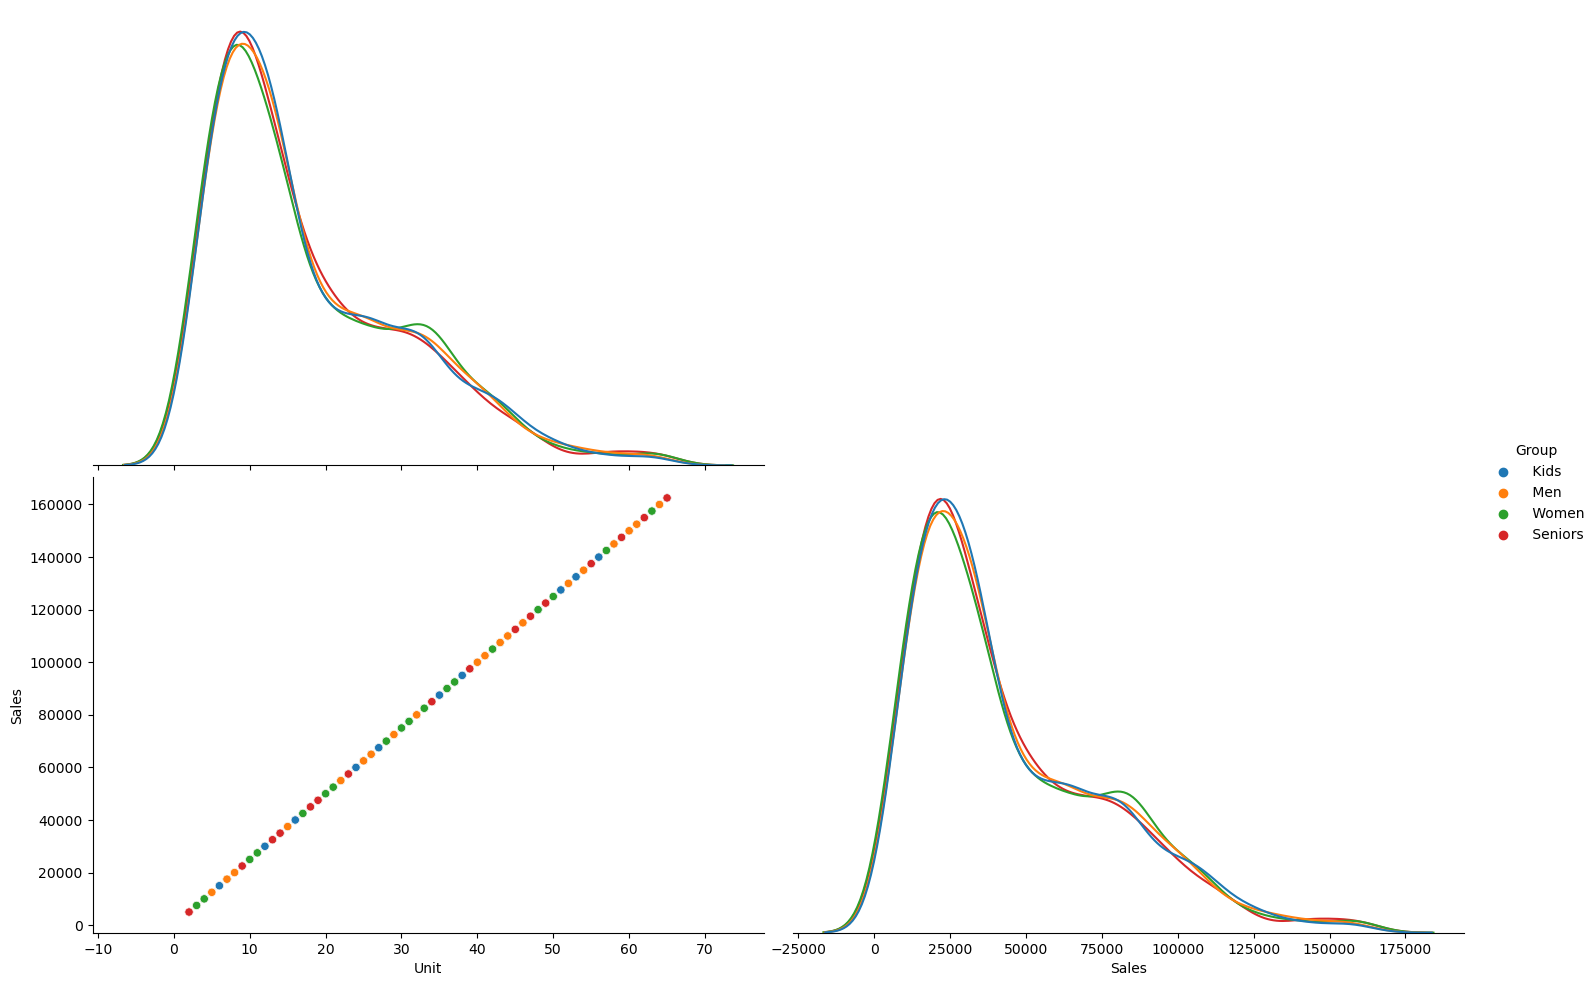

In [46]:
# cretaing pairplots for the dataset
sns.pairplot(df,hue='Group',height=5, aspect =1.5,kind='scatter',corner=True,diag_kws=dict(fill=False))

* Sales and units are right skewed. Long tail indicates that outliers may be present.
* The strong positive linear relationship between units and sales is shown in the pairplot above. There is high correlation between units and sales.

Both conditions given above is true for all four categories.

D:\Aconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


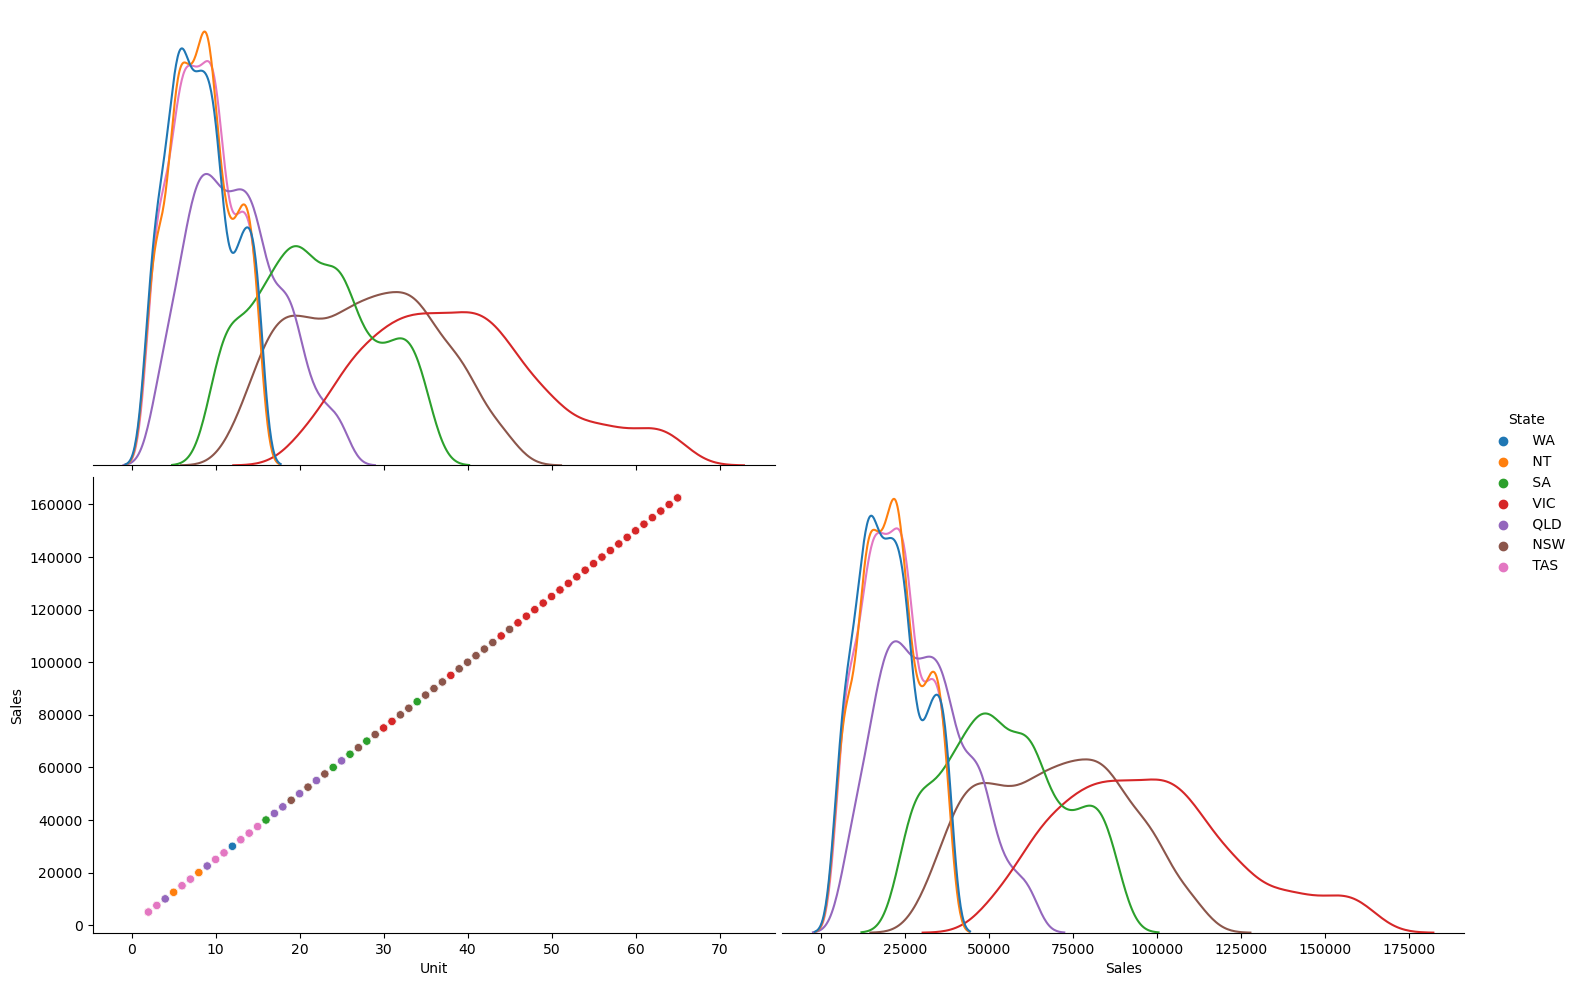

In [47]:
# cretaing pairplots for the dataset
sns.pairplot(df,hue='State',height=5, aspect =1.5,kind='scatter',corner=True,diag_kws=dict(fill=False))

* The strong positive linear relationship between units and sales is shown in the pairplot above. There is high correlation between units and sales.
* All states have non overlapping distributions, which indicates that each state have different means.
* WA, NT, TAS have similar distributions. All of them are more or less normal bimodal distributions. But the mean values are different. the spread for all three is from 0 to 40000.
* SA, VIC, QLD, and NSW are all multimodal histograms. VIC have maximum spread among them. QLD have laesr skewnness and it's multimodal

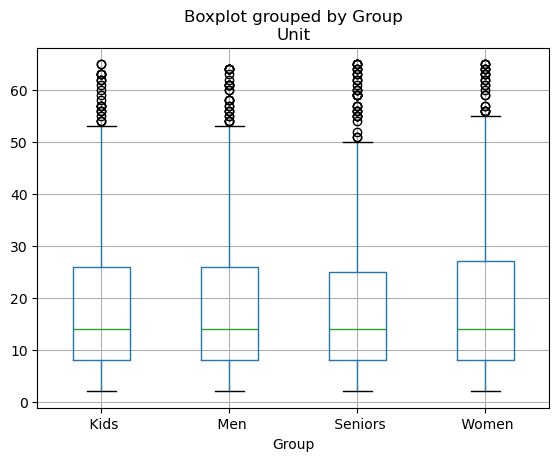

In [48]:
# boxplots for outlier detection
df.boxplot(column='Unit',by='Group');

There are many outiers in units in every groups. We need to analyse more about these.

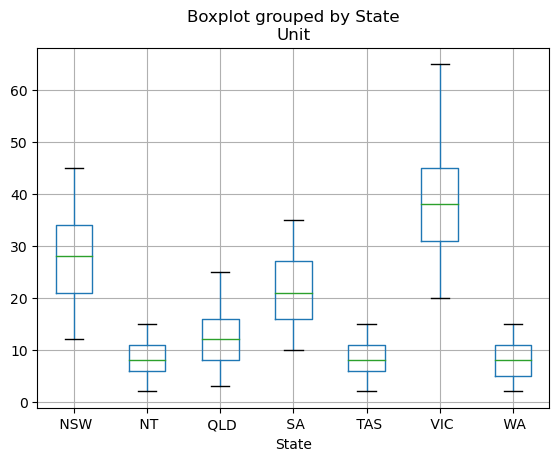

In [49]:
df.boxplot(column='Unit',by='State');

No outliers are there in unit when plotted for each state.

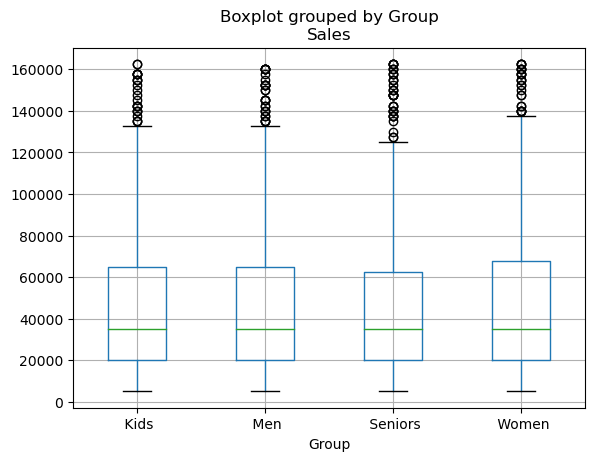

In [50]:
# boxplots for outlier detection
df.boxplot(column='Sales',by='Group');

As in unit, there are many outliers in sales for each group. We need more deeper analysis of outliers or may need to use algorithms that are not effected by outliers.

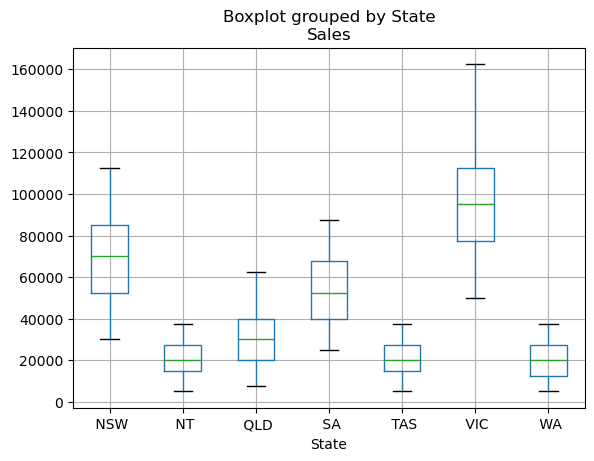

In [51]:
# boxplots for outlier detection
df.boxplot(column='Sales',by='State');

There are no outliers in sales for any of the states.

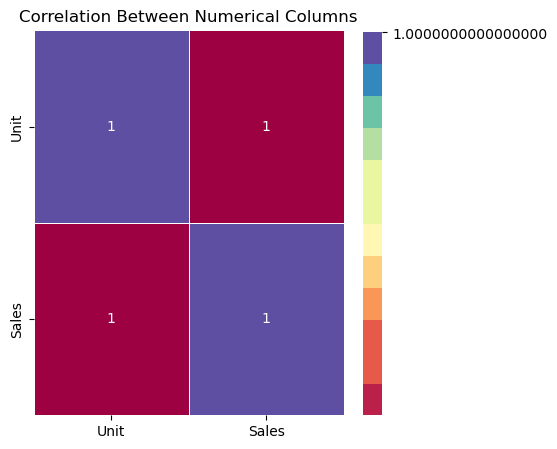

In [52]:
# creating correlation matrix of numerical columns and plotting it.
corr_matrix = numeric_data.corr()
plt.figure(figsize=(5,5))
plt.title('Correlation Between Numerical Columns')
#sns.heatmap(corr_matrix, annot=False, cmap='Blues')
sns.heatmap(corr_matrix,annot=True,xticklabels=True, yticklabels=True,linewidth=.5,cmap='Spectral')
plt.show()

From pairplot also we got that both unit and sales have high positive correlation, which value=1.

### 3. Data Visualization

#### Groupwise sales analysis of different states

In [53]:
# creating a table for groupwise sales of different states
daily_sales_state_group = df.groupby(['Date','State','Group'])['Sales'].sum()
dssg=daily_sales_state_group.unstack()
dssg= dssg.unstack()
dssg.head(3)

Group         Kids                                                  Men  \
State          NSW     NT     QLD      SA    TAS     VIC     WA     NSW   
Date                                                                      
2020-10-01  252500  97500  122500  107500  60000  267500  65000  187500   
2020-10-02  212500  57500   70000  125000  65000  325000  67500  277500   
2020-10-03  205000  65000  105000  150000  42500  315000  67500  182500   

Group                      ...  Seniors                  Women                 \
State          NT     QLD  ...      TAS     VIC     WA     NSW     NT     QLD   
Date                       ...                                                  
2020-10-01  42500   82500  ...    62500  255000  90000  235000  47500   75000   
2020-10-02  87500   97500  ...    77500  195000  62500  180000  60000   70000   
2020-10-03  75000  117500  ...    70000  320000  40000  270000  72500  112500   

Group                                     
State           SA    TAS     VIC     WA  
Date                                      
2020-10-01  172500  55000  275000  25000  
2020-10-02  167500  52500  300000  65000  
2020-10-03  172500  77500  325000  65000  

[3 rows x 28 columns]

In [54]:
# statistical analysis 
dssg.describe()

Group           Kids                                               \
State            NSW             NT            QLD             SA   
count      90.000000      90.000000      90.000000      90.000000   
mean   206527.777778   63333.333333   94555.555556  161277.777778   
std     41603.557075   20299.720483   28672.839245   38298.143757   
min    107500.000000   27500.000000   27500.000000   87500.000000   
25%    175625.000000   47500.000000   73125.000000  130000.000000   
50%    203750.000000   60000.000000   91250.000000  161250.000000   
75%    236875.000000   79375.000000  112500.000000  191875.000000   
max    312500.000000  105000.000000  185000.000000  250000.000000   

Group                                                        Men  \
State            TAS            VIC            WA            NSW   
count      90.000000      90.000000     90.000000      90.000000   
mean    64166.666667  292888.888889  62500.000000  211361.111111   
std     17096.060391   52583.415689  17996.566464   39636.978236   
min     30000.000000  192500.000000  25000.000000  132500.000000   
25%     50625.000000  255625.000000  48125.000000  180000.000000   
50%     65000.000000  281250.000000  65000.000000  208750.000000   
75%     77500.000000  328750.000000  77500.000000  235000.000000   
max    100000.000000  422500.000000  97500.000000  302500.000000   

Group                                ...       Seniors                 \
State             NT            QLD  ...           TAS            VIC   
count      90.000000      90.000000  ...     90.000000      90.000000   
mean    64027.777778   93250.000000  ...  62777.777778  292388.888889   
std     20898.680286   29110.044021  ...  17845.483977   62108.222771   
min     20000.000000   27500.000000  ...  22500.000000  175000.000000   
25%     47500.000000   70625.000000  ...  50000.000000  255000.000000   
50%     62500.000000   95000.000000  ...  65000.000000  277500.000000   
75%     81875.000000  112500.000000  ...  75000.000000  336250.000000   
max    102500.000000  167500.000000  ...  97500.000000  457500.000000   

Group                         Women                                \
State             WA            NSW             NT            QLD   
count      90.000000      90.000000      90.000000      90.000000   
mean    61250.000000  213027.777778   62805.555556   92500.000000   
std     19018.212738   42816.066048   19730.728678   29046.166275   
min     17500.000000  115000.000000   27500.000000   35000.000000   
25%     47500.000000  180625.000000   47500.000000   72500.000000   
50%     58750.000000  220000.000000   62500.000000   87500.000000   
75%     75000.000000  242500.000000   75000.000000  112500.000000   
max    102500.000000  315000.000000  112500.000000  157500.000000   

Group                                                              
State             SA            TAS            VIC             WA  
count      90.000000      90.000000      90.000000      90.000000  
mean   166333.333333   61972.222222  294250.000000   58472.222222  
std     34054.648745   19210.156652   57134.832151   18804.488036  
min     80000.000000   27500.000000  195000.000000   25000.000000  
25%    140000.000000   47500.000000  253125.000000   43125.000000  
50%    165000.000000   63750.000000  278750.000000   60000.000000  
75%    187500.000000   77500.000000  336250.000000   72500.000000  
max    250000.000000  107500.000000  435000.000000  102500.000000  

[8 rows x 28 columns]

In [55]:
print("The maximum recorded sales values for each of the groups for every state")
dssg.max(axis=0)

The maximum recorded sales values for each of the groups for every state


Group     State
 Kids      NSW     312500
           NT      105000
           QLD     185000
           SA      250000
           TAS     100000
           VIC     422500
           WA       97500
 Men       NSW     302500
           NT      102500
           QLD     167500
           SA      227500
           TAS     102500
           VIC     432500
           WA       97500
 Seniors   NSW     305000
           NT      100000
           QLD     162500
           SA      252500
           TAS      97500
           VIC     457500
           WA      102500
 Women     NSW     315000
           NT      112500
           QLD     157500
           SA      250000
           TAS     107500
           VIC     435000
           WA      102500
dtype: int64

In [56]:
print("The minimum recorded sales values for each of the groups for every state")
dssg.min(axis=0)

The minimum recorded sales values for each of the groups for every state


Group     State
 Kids      NSW     107500
           NT       27500
           QLD      27500
           SA       87500
           TAS      30000
           VIC     192500
           WA       25000
 Men       NSW     132500
           NT       20000
           QLD      27500
           SA       97500
           TAS      25000
           VIC     182500
           WA       30000
 Seniors   NSW     120000
           NT       25000
           QLD      32500
           SA       95000
           TAS      22500
           VIC     175000
           WA       17500
 Women     NSW     115000
           NT       27500
           QLD      35000
           SA       80000
           TAS      27500
           VIC     195000
           WA       25000
dtype: int64

In [57]:
# Resampling the daily sales for getting the weekly sales 
weekly_dssg= dssg.resample('W').sum()
print("Weekly sales")
weekly_dssg.head(3)

Weekly sales


Group          Kids                                                    \
State           NSW      NT     QLD       SA     TAS      VIC      WA   
Date                                                                    
2020-10-04   867500  277500  415000   502500  237500  1142500  247500   
2020-10-11  1640000  517500  622500  1247500  512500  2025000  455000   
2020-10-18  1425000  500000  707500  1152500  497500  1912500  512500   

Group           Men                  ...  Seniors                     Women  \
State           NSW      NT     QLD  ...      TAS      VIC      WA      NSW   
Date                                 ...                                      
2020-10-04   837500  250000  420000  ...   285000  1007500  262500   940000   
2020-10-11  1492500  495000  647500  ...   455000  2057500  445000  1510000   
2020-10-18  1350000  495000  702500  ...   447500  1950000  492500  1510000   

Group                                                         
State           NT     QLD       SA     TAS      VIC      WA  
Date                                                          
2020-10-04  235000  352500   665000  257500  1162500  230000  
2020-10-11  380000  582500  1147500  490000  1877500  450000  
2020-10-18  575000  660000  1232500  407500  1967500  400000  

[3 rows x 28 columns]

In [58]:
# statistical analysis 
weekly_dssg.describe()

Group          Kids                                              \
State           NSW             NT            QLD            SA   
count  1.400000e+01      14.000000      14.000000  1.400000e+01   
mean   1.327679e+06  407142.857143  607857.142857  1.036786e+06   
std    2.818440e+05   97806.997660  186266.086406  2.785081e+05   
min    7.550000e+05  267500.000000  327500.000000  5.025000e+05   
25%    1.179375e+06  314375.000000  463125.000000  8.662500e+05   
50%    1.372500e+06  440000.000000  591250.000000  1.081250e+06   
75%    1.521250e+06  486875.000000  701875.000000  1.237500e+06   
max    1.680000e+06  540000.000000  920000.000000  1.442500e+06   

Group                                                       Men  \
State            TAS           VIC             WA           NSW   
count      14.000000  1.400000e+01      14.000000  1.400000e+01   
mean   412500.000000  1.882857e+06  401785.714286  1.358750e+06   
std    108508.241445  4.489291e+05  116748.532240  3.036568e+05   
min    237500.000000  1.072500e+06  230000.000000  7.750000e+05   
25%    325000.000000  1.642500e+06  294375.000000  1.194375e+06   
50%    441250.000000  1.867500e+06  422500.000000  1.396250e+06   
75%    510000.000000  2.206875e+06  495625.000000  1.600000e+06   
max    527500.000000  2.510000e+06  585000.000000  1.735000e+06   

Group                                ...        Seniors                \
State             NT            QLD  ...            TAS           VIC   
count      14.000000      14.000000  ...      14.000000  1.400000e+01   
mean   411607.142857  599464.285714  ...  403571.428571  1.879643e+06   
std    131363.438681  168668.936573  ...   96713.863683  4.984909e+05   
min    200000.000000  375000.000000  ...  257500.000000  1.007500e+06   
25%    302500.000000  480000.000000  ...  318750.000000  1.658750e+06   
50%    431250.000000  573750.000000  ...  416250.000000  1.836250e+06   
75%    510000.000000  732500.000000  ...  498125.000000  2.155000e+06   
max    590000.000000  900000.000000  ...  520000.000000  2.650000e+06   

Group                        Women                                \
State             WA           NSW             NT            QLD   
count      14.000000  1.400000e+01      14.000000      14.000000   
mean   393750.000000  1.369464e+06  403750.000000  594642.857143   
std    115478.727645  3.201430e+05  129691.757344  168479.789769   
min    227500.000000  7.100000e+05  195000.000000  352500.000000   
25%    286250.000000  1.198750e+06  309375.000000  458750.000000   
50%    396250.000000  1.422500e+06  367500.000000  567500.000000   
75%    503750.000000  1.598125e+06  485625.000000  730000.000000   
max    532500.000000  1.905000e+06  597500.000000  862500.000000   

Group                                                            
State            SA            TAS           VIC             WA  
count  1.400000e+01      14.000000  1.400000e+01      14.000000  
mean   1.069286e+06  398392.857143  1.891607e+06  375892.857143  
std    2.689392e+05  112080.873715  4.550440e+05  110251.491979  
min    5.875000e+05  252500.000000  1.050000e+06  230000.000000  
25%    9.118750e+05  301250.000000  1.692500e+06  296250.000000  
50%    1.071250e+06  377500.000000  1.843750e+06  375000.000000  
75%    1.256875e+06  483750.000000  2.241875e+06  468750.000000  
max    1.512500e+06  580000.000000  2.597500e+06  530000.000000  

[8 rows x 28 columns]

In [59]:
print("The maximum recorded sales values for each of the groups for every state")
weekly_dssg.max(axis=0)

The maximum recorded sales values for each of the groups for every state


Group     State
 Kids      NSW     1680000
           NT       540000
           QLD      920000
           SA      1442500
           TAS      527500
           VIC     2510000
           WA       585000
 Men       NSW     1735000
           NT       590000
           QLD      900000
           SA      1362500
           TAS      570000
           VIC     2650000
           WA       582500
 Seniors   NSW     1767500
           NT       545000
           QLD      827500
           SA      1300000
           TAS      520000
           VIC     2650000
           WA       532500
 Women     NSW     1905000
           NT       597500
           QLD      862500
           SA      1512500
           TAS      580000
           VIC     2597500
           WA       530000
dtype: int64

In [60]:
print("The minimum recorded sales values for each of the groups for every state")
weekly_dssg.min(axis=0)

The minimum recorded sales values for each of the groups for every state


Group     State
 Kids      NSW      755000
           NT       267500
           QLD      327500
           SA       502500
           TAS      237500
           VIC     1072500
           WA       230000
 Men       NSW      775000
           NT       200000
           QLD      375000
           SA       572500
           TAS      245000
           VIC     1007500
           WA       227500
 Seniors   NSW      730000
           NT       230000
           QLD      342500
           SA       560000
           TAS      257500
           VIC     1007500
           WA       227500
 Women     NSW      710000
           NT       195000
           QLD      352500
           SA       587500
           TAS      252500
           VIC     1050000
           WA       230000
dtype: int64

In [61]:
# Resampling the daily sales for getting the monthly sales 
monthly_dssg = dssg.resample('M').sum()
print("Monthly sales")
monthly_dssg

Monthly sales


Group          Kids                                                         \
State           NSW       NT      QLD       SA      TAS       VIC       WA   
Date                                                                         
2020-10-31  6340000  2140000  2837500  4990000  2050000   8312500  1965000   
2020-11-30  5312500  1332500  2042500  3810000  1472500   7542500  1370000   
2020-12-31  6935000  2227500  3630000  5715000  2252500  10505000  2290000   

Group           Men                    ...  Seniors                     \
State           NSW       NT      QLD  ...      TAS       VIC       WA   
Date                                   ...                               
2020-10-31  6270000  2122500  2855000  ...  2022500   8367500  1987500   
2020-11-30  5490000  1280000  1982500  ...  1385000   7232500  1295000   
2020-12-31  7262500  2360000  3555000  ...  2242500  10715000  2230000   

Group         Women                                                         
State           NSW       NT      QLD       SA      TAS       VIC       WA  
Date                                                                        
2020-10-31  6482500  1990000  2655000  5002500  1907500   8375000  1792500  
2020-11-30  5325000  1385000  2092500  4017500  1337500   7485000  1220000  
2020-12-31  7365000  2277500  3577500  5950000  2332500  10622500  2250000  

[3 rows x 28 columns]

In [62]:
# statistical analysis
monthly_dssg.describe()

Group          Kids                                                          \
State           NSW            NT           QLD            SA           TAS   
count  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
mean   6.195833e+06  1.900000e+06  2.836667e+06  4.838333e+06  1.925000e+06   
std    8.208012e+05  4.934129e+05  7.937503e+05  9.615136e+05  4.047453e+05   
min    5.312500e+06  1.332500e+06  2.042500e+06  3.810000e+06  1.472500e+06   
25%    5.826250e+06  1.736250e+06  2.440000e+06  4.400000e+06  1.761250e+06   
50%    6.340000e+06  2.140000e+06  2.837500e+06  4.990000e+06  2.050000e+06   
75%    6.637500e+06  2.183750e+06  3.233750e+06  5.352500e+06  2.151250e+06   
max    6.935000e+06  2.227500e+06  3.630000e+06  5.715000e+06  2.252500e+06   

Group                                       Men                              \
State           VIC            WA           NSW            NT           QLD   
count  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
mean   8.786667e+06  1.875000e+06  6.340833e+06  1.920833e+06  2.797500e+06   
std    1.537116e+06  4.665565e+05  8.883705e+05  5.675404e+05  7.878253e+05   
min    7.542500e+06  1.370000e+06  5.490000e+06  1.280000e+06  1.982500e+06   
25%    7.927500e+06  1.667500e+06  5.880000e+06  1.701250e+06  2.418750e+06   
50%    8.312500e+06  1.965000e+06  6.270000e+06  2.122500e+06  2.855000e+06   
75%    9.408750e+06  2.127500e+06  6.766250e+06  2.241250e+06  3.205000e+06   
max    1.050500e+07  2.290000e+06  7.262500e+06  2.360000e+06  3.555000e+06   

Group  ...       Seniors                                     Women  \
State  ...           TAS           VIC            WA           NSW   
count  ...  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
mean   ...  1.883333e+06  8.771667e+06  1.837500e+06  6.390833e+06   
std    ...  4.453674e+05  1.776081e+06  4.852126e+05  1.023085e+06   
min    ...  1.385000e+06  7.232500e+06  1.295000e+06  5.325000e+06   
25%    ...  1.703750e+06  7.800000e+06  1.641250e+06  5.903750e+06   
50%    ...  2.022500e+06  8.367500e+06  1.987500e+06  6.482500e+06   
75%    ...  2.132500e+06  9.541250e+06  2.108750e+06  6.923750e+06   
max    ...  2.242500e+06  1.071500e+07  2.230000e+06  7.365000e+06   

Group                                                                        \
State            NT           QLD            SA           TAS           VIC   
count  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
mean   1.884167e+06  2.775000e+06  4.990000e+06  1.859167e+06  8.827500e+06   
std    4.555651e+05  7.497375e+05  9.663106e+05  4.992578e+05  1.616955e+06   
min    1.385000e+06  2.092500e+06  4.017500e+06  1.337500e+06  7.485000e+06   
25%    1.687500e+06  2.373750e+06  4.510000e+06  1.622500e+06  7.930000e+06   
50%    1.990000e+06  2.655000e+06  5.002500e+06  1.907500e+06  8.375000e+06   
75%    2.133750e+06  3.116250e+06  5.476250e+06  2.120000e+06  9.498750e+06   
max    2.277500e+06  3.577500e+06  5.950000e+06  2.332500e+06  1.062250e+07   

Group                
State            WA  
count  3.000000e+00  
mean   1.754167e+06  
std    5.160689e+05  
min    1.220000e+06  
25%    1.506250e+06  
50%    1.792500e+06  
75%    2.021250e+06  
max    2.250000e+06  

[8 rows x 28 columns]

In [63]:
print("The maximum recorded sales values for each of the groups for every state")
monthly_dssg.max(axis=0)

The maximum recorded sales values for each of the groups for every state


Group     State
 Kids      NSW      6935000
           NT       2227500
           QLD      3630000
           SA       5715000
           TAS      2252500
           VIC     10505000
           WA       2290000
 Men       NSW      7262500
           NT       2360000
           QLD      3555000
           SA       5657500
           TAS      2372500
           VIC     10750000
           WA       2292500
 Seniors   NSW      6910000
           NT       2235000
           QLD      3425000
           SA       5530000
           TAS      2242500
           VIC     10715000
           WA       2230000
 Women     NSW      7365000
           NT       2277500
           QLD      3577500
           SA       5950000
           TAS      2332500
           VIC     10622500
           WA       2250000
dtype: int64

In [64]:
print("The minimum recorded sales values for each of the groups for every state")
monthly_dssg.min(axis=0)

The minimum recorded sales values for each of the groups for every state


Group     State
 Kids      NSW     5312500
           NT      1332500
           QLD     2042500
           SA      3810000
           TAS     1472500
           VIC     7542500
           WA      1370000
 Men       NSW     5490000
           NT      1280000
           QLD     1982500
           SA      3910000
           TAS     1350000
           VIC     7270000
           WA      1332500
 Seniors   NSW     5362500
           NT      1260000
           QLD     1992500
           SA      3795000
           TAS     1385000
           VIC     7232500
           WA      1295000
 Women     NSW     5325000
           NT      1385000
           QLD     2092500
           SA      4017500
           TAS     1337500
           VIC     7485000
           WA      1220000
dtype: int64

In [65]:
# Resampling the daily sales for getting the quarterly sales 
quarterly_dssg = dssg.resample('Q').sum()
print("Quarterly sales")
quarterly_dssg

Quarterly sales


Group           Kids                                                          \
State            NSW       NT      QLD        SA      TAS       VIC       WA   
Date                                                                           
2020-12-31  18587500  5700000  8510000  14515000  5775000  26360000  5625000   

Group            Men                    ...  Seniors                     \
State            NSW       NT      QLD  ...      TAS       VIC       WA   
Date                                    ...                               
2020-12-31  19022500  5762500  8392500  ...  5650000  26315000  5512500   

Group          Women                                                          
State            NSW       NT      QLD        SA      TAS       VIC       WA  
Date                                                                          
2020-12-31  19172500  5652500  8325000  14970000  5577500  26482500  5262500  

[1 rows x 28 columns]

In [66]:
# statistical analysis
quarterly_dssg.describe().T

count        mean  std         min         25%         50%  \
Group    State                                                               
 Kids     NSW     1.0  18587500.0  NaN  18587500.0  18587500.0  18587500.0   
          NT      1.0   5700000.0  NaN   5700000.0   5700000.0   5700000.0   
          QLD     1.0   8510000.0  NaN   8510000.0   8510000.0   8510000.0   
          SA      1.0  14515000.0  NaN  14515000.0  14515000.0  14515000.0   
          TAS     1.0   5775000.0  NaN   5775000.0   5775000.0   5775000.0   
          VIC     1.0  26360000.0  NaN  26360000.0  26360000.0  26360000.0   
          WA      1.0   5625000.0  NaN   5625000.0   5625000.0   5625000.0   
 Men      NSW     1.0  19022500.0  NaN  19022500.0  19022500.0  19022500.0   
          NT      1.0   5762500.0  NaN   5762500.0   5762500.0   5762500.0   
          QLD     1.0   8392500.0  NaN   8392500.0   8392500.0   8392500.0   
          SA      1.0  14655000.0  NaN  14655000.0  14655000.0  14655000.0   
          TAS     1.0   5757500.0  NaN   5757500.0   5757500.0   5757500.0   
          VIC     1.0  26407500.0  NaN  26407500.0  26407500.0  26407500.0   
          WA      1.0   5752500.0  NaN   5752500.0   5752500.0   5752500.0   
 Seniors  NSW     1.0  18187500.0  NaN  18187500.0  18187500.0  18187500.0   
          NT      1.0   5465000.0  NaN   5465000.0   5465000.0   5465000.0   
          QLD     1.0   8190000.0  NaN   8190000.0   8190000.0   8190000.0   
          SA      1.0  14717500.0  NaN  14717500.0  14717500.0  14717500.0   
          TAS     1.0   5650000.0  NaN   5650000.0   5650000.0   5650000.0   
          VIC     1.0  26315000.0  NaN  26315000.0  26315000.0  26315000.0   
          WA      1.0   5512500.0  NaN   5512500.0   5512500.0   5512500.0   
 Women    NSW     1.0  19172500.0  NaN  19172500.0  19172500.0  19172500.0   
          NT      1.0   5652500.0  NaN   5652500.0   5652500.0   5652500.0   
          QLD     1.0   8325000.0  NaN   8325000.0   8325000.0   8325000.0   
          SA      1.0  14970000.0  NaN  14970000.0  14970000.0  14970000.0   
          TAS     1.0   5577500.0  NaN   5577500.0   5577500.0   5577500.0   
          VIC     1.0  26482500.0  NaN  26482500.0  26482500.0  26482500.0   
          WA      1.0   5262500.0  NaN   5262500.0   5262500.0   5262500.0   

                       75%         max  
Group    State                          
 Kids     NSW   18587500.0  18587500.0  
          NT     5700000.0   5700000.0  
          QLD    8510000.0   8510000.0  
          SA    14515000.0  14515000.0  
          TAS    5775000.0   5775000.0  
          VIC   26360000.0  26360000.0  
          WA     5625000.0   5625000.0  
 Men      NSW   19022500.0  19022500.0  
          NT     5762500.0   5762500.0  
          QLD    8392500.0   8392500.0  
          SA    14655000.0  14655000.0  
          TAS    5757500.0   5757500.0  
          VIC   26407500.0  26407500.0  
          WA     5752500.0   5752500.0  
 Seniors  NSW   18187500.0  18187500.0  
          NT     5465000.0   5465000.0  
          QLD    8190000.0   8190000.0  
          SA    14717500.0  14717500.0  
          TAS    5650000.0   5650000.0  
          VIC   26315000.0  26315000.0  
          WA     5512500.0   5512500.0  
 Women    NSW   19172500.0  19172500.0  
          NT     5652500.0   5652500.0  
          QLD    8325000.0   8325000.0  
          SA    14970000.0  14970000.0  
          TAS    5577500.0   5577500.0  
          VIC   26482500.0  26482500.0  
          WA     5262500.0   5262500.0

Daily sales


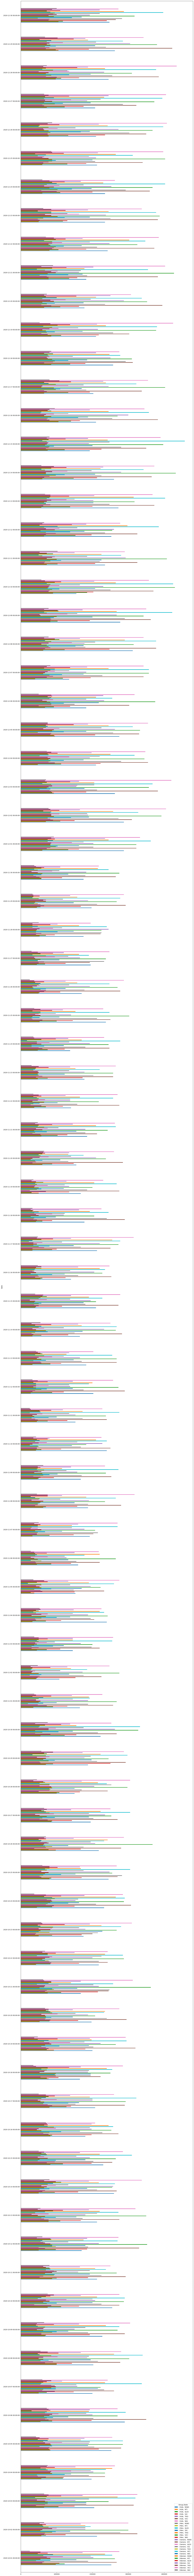

In [67]:
print("Daily sales")
dssg.plot(kind='barh',figsize=(20,300));

Weekly sales


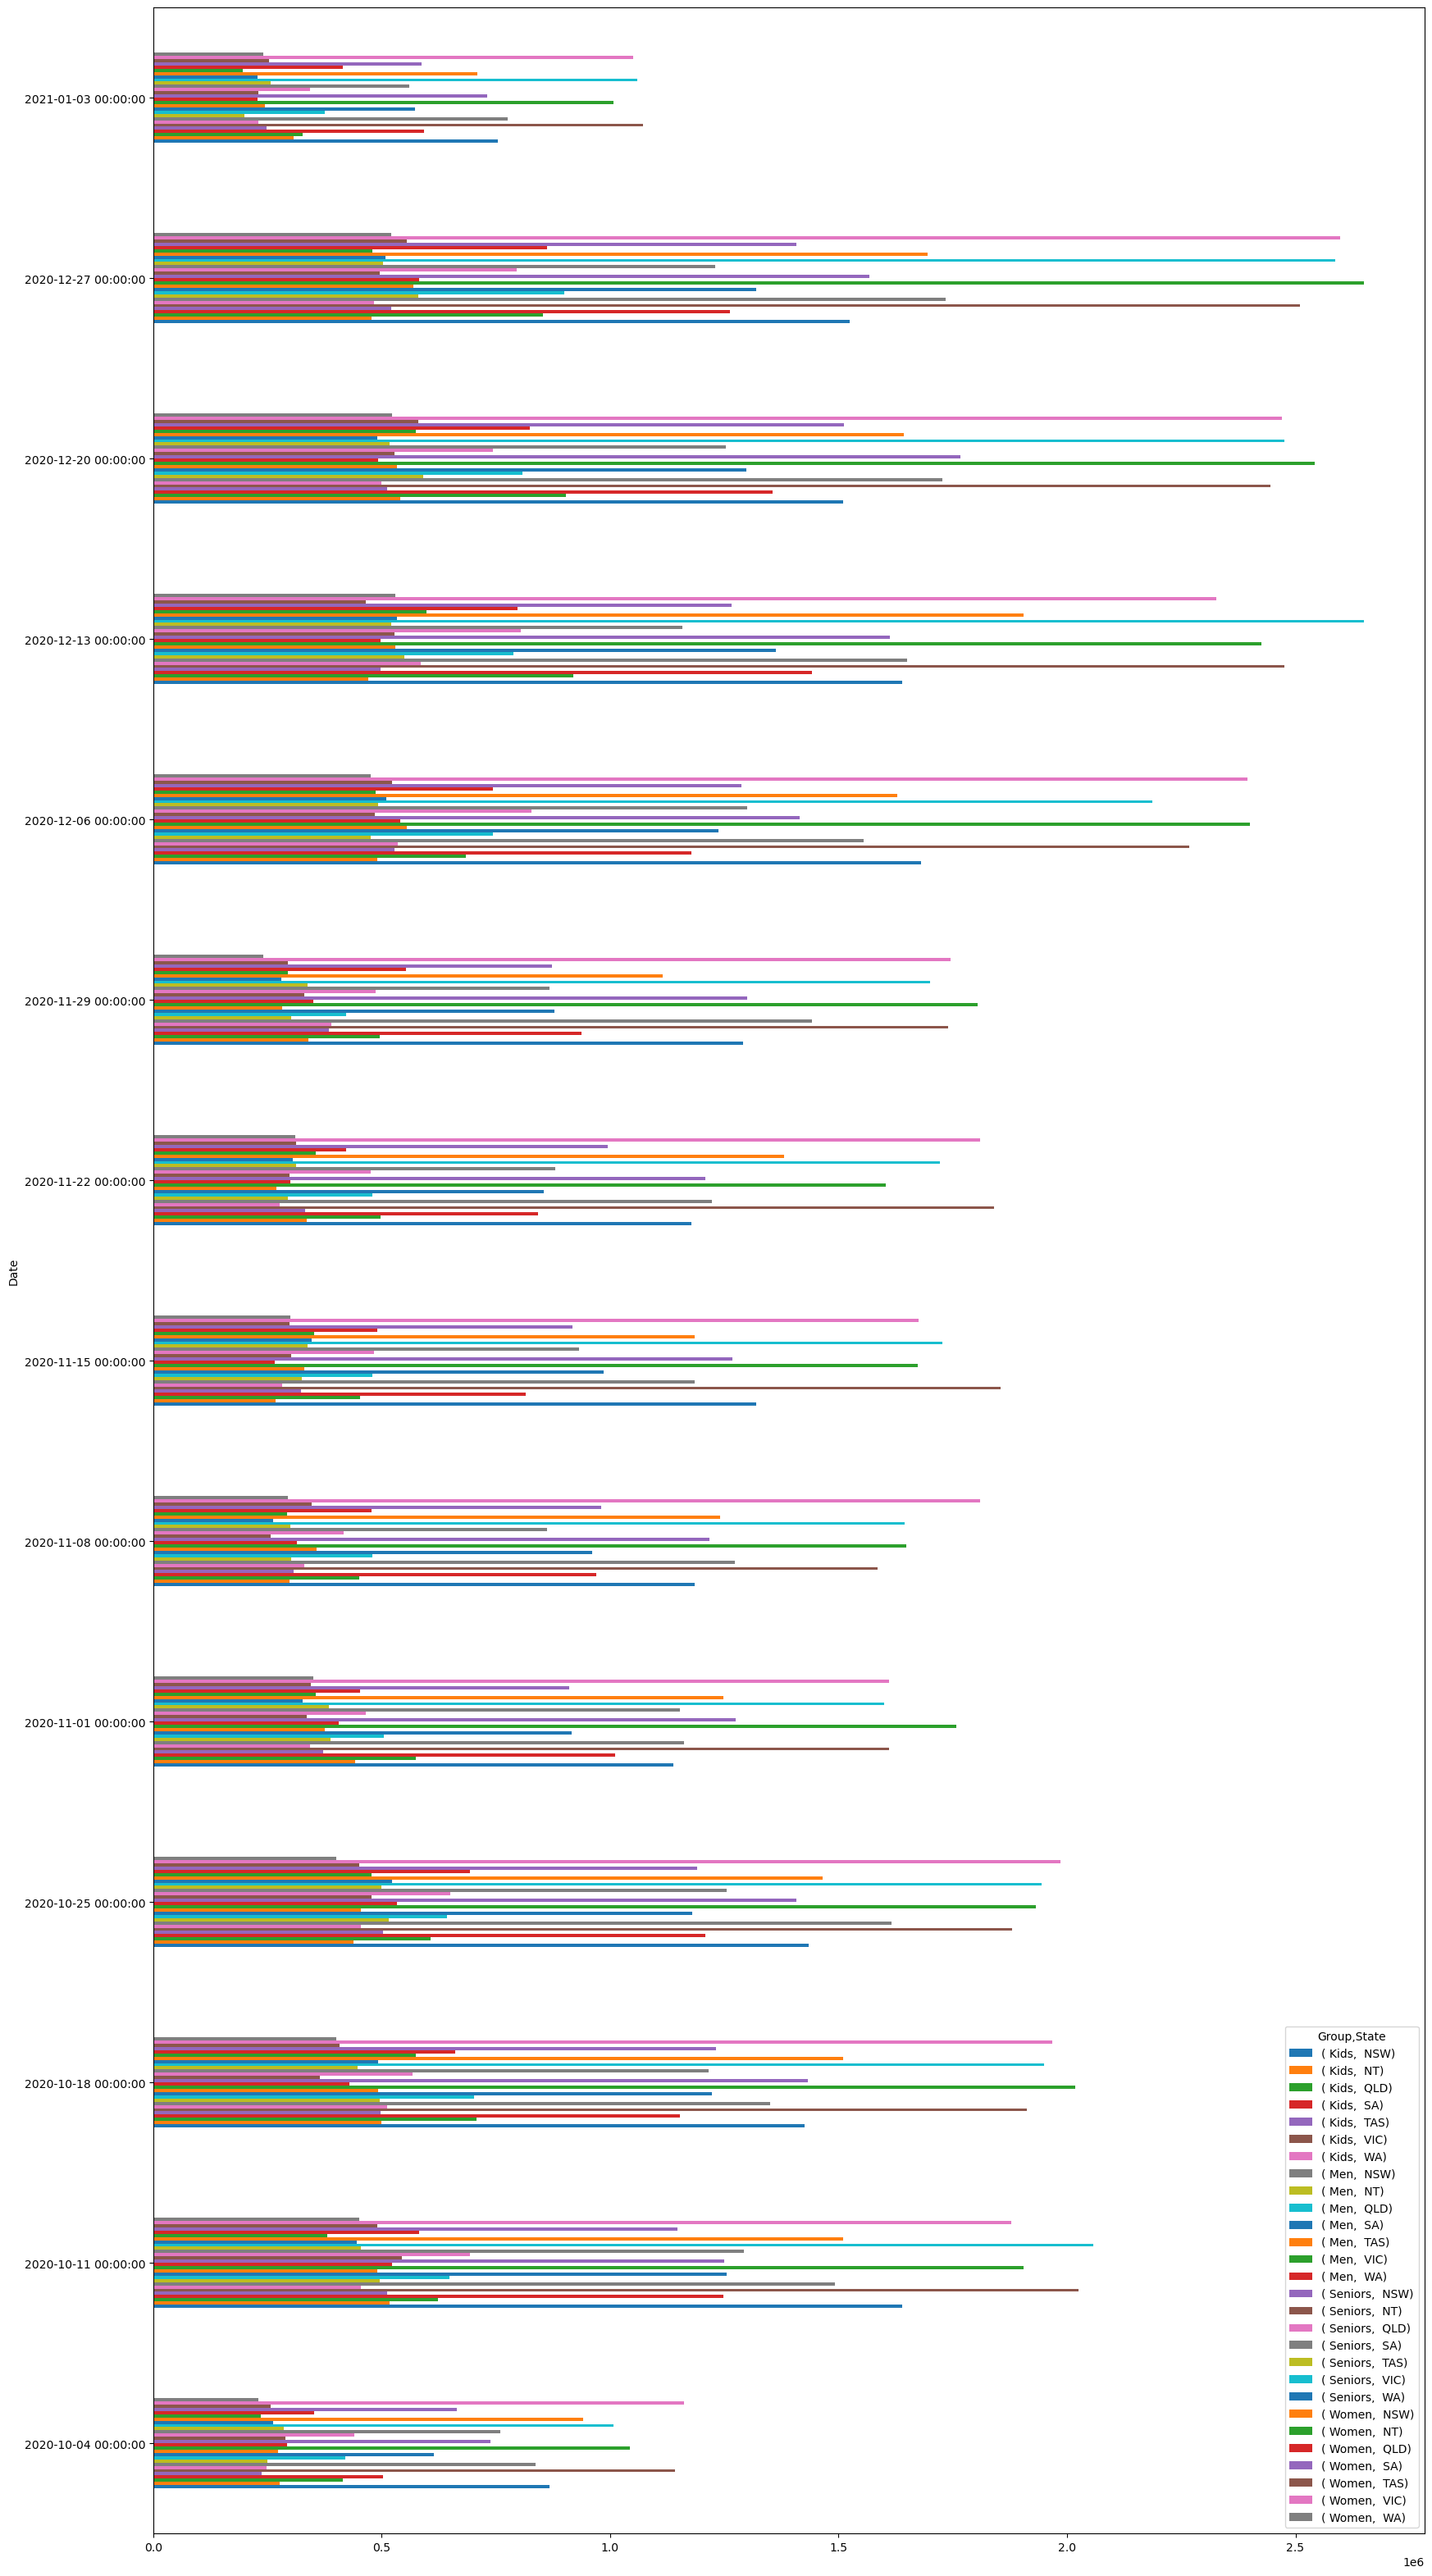

In [68]:
print("Weekly sales")
weekly_dssg.plot(kind='barh',figsize=(20,40));

Monthly sales


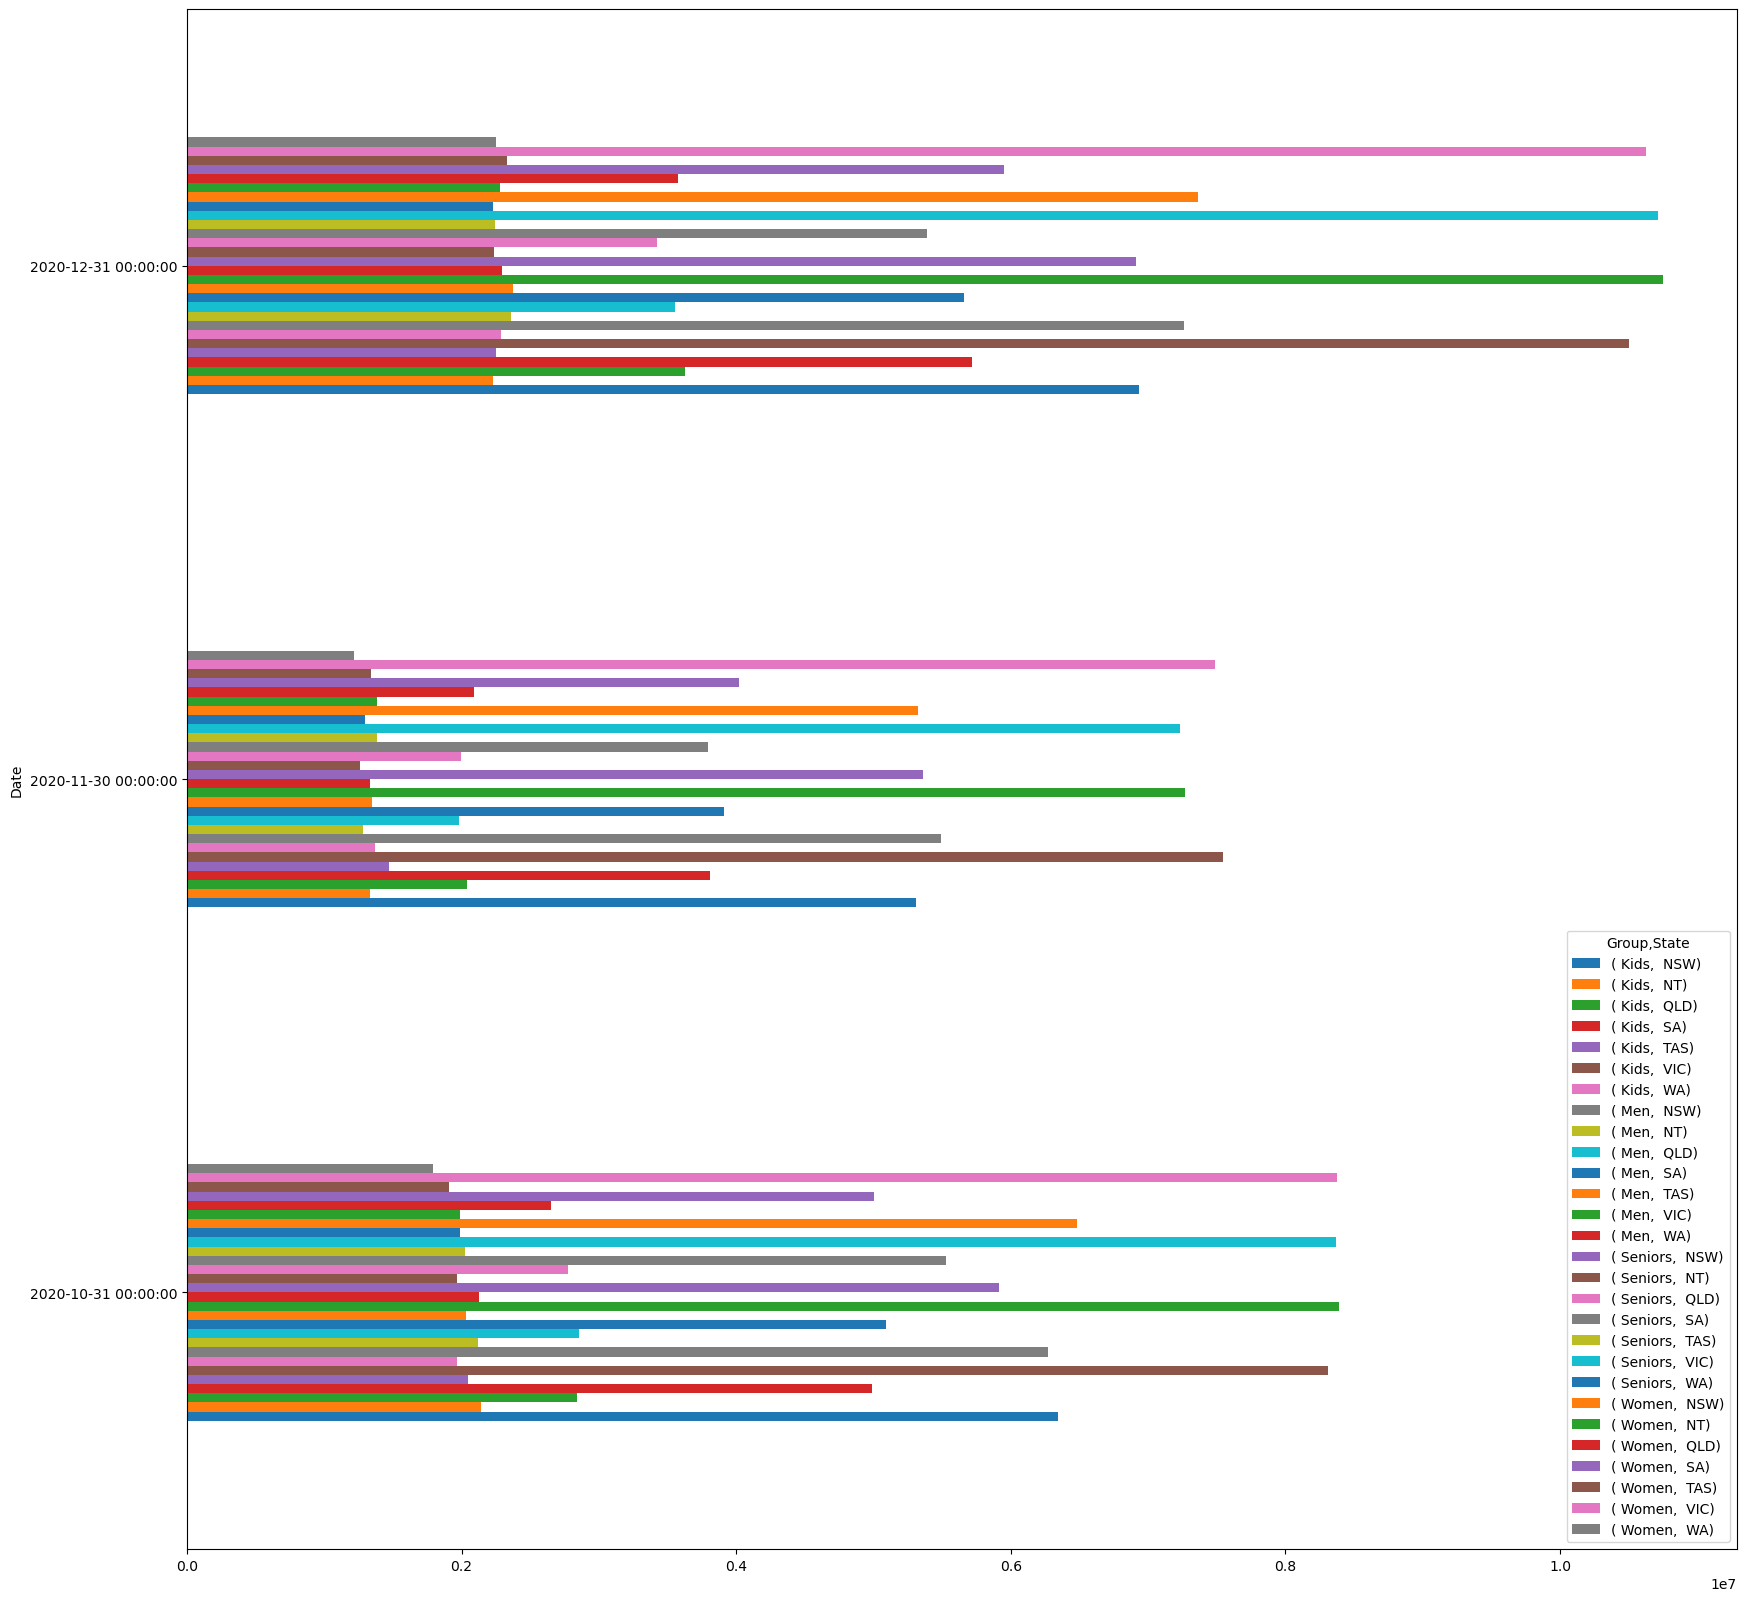

In [69]:
print("Monthly sales")
monthly_dssg.plot(kind='barh',figsize=(20,20));

Quarterly sales


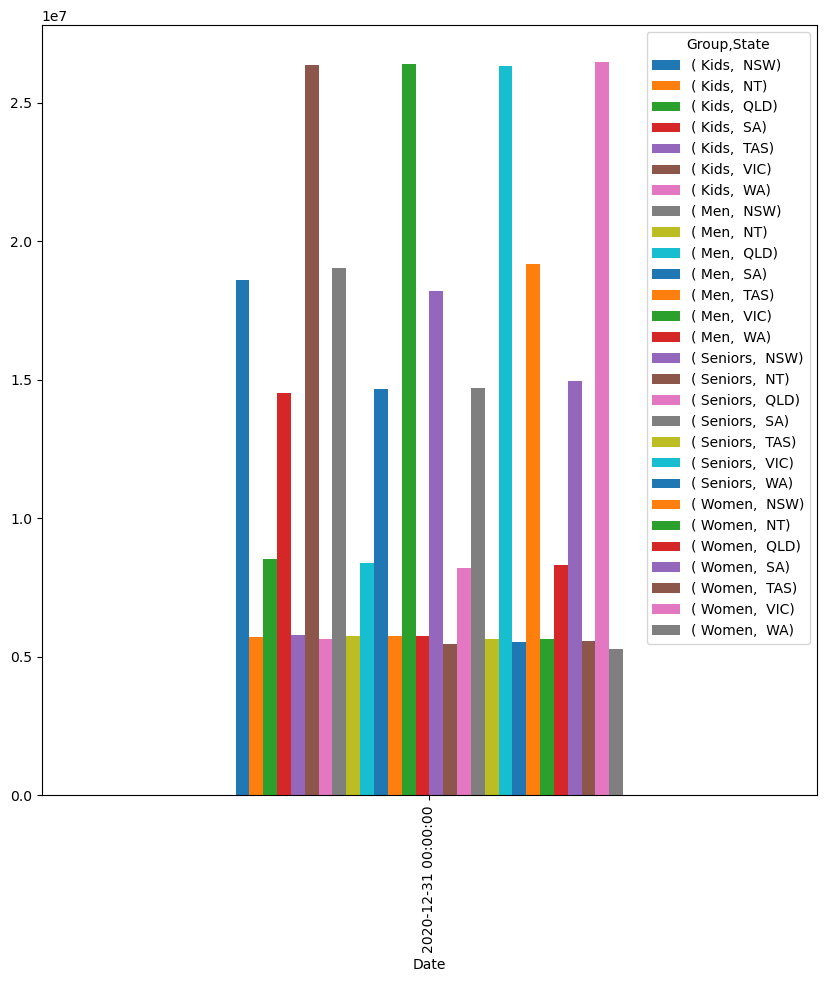

In [70]:
print("Quarterly sales")
quarterly_dssg.plot(kind='bar',figsize=(10,10));

#### Statewise sales analysis of different groups

In [71]:
# creating a table for groupwise sales of different states
daily_sales_group_state = df.groupby(['Date','Group','State'])['Sales'].sum()
dsgs=daily_sales_group_state.unstack()
dsgs= dsgs.unstack()
dsgs.head(3)

State          NSW                              NT                         \
Group         Kids     Men  Seniors   Women   Kids    Men  Seniors  Women   
Date                                                                        
2020-10-01  252500  187500   202500  235000  97500  42500    72500  47500   
2020-10-02  212500  277500   180000  180000  57500  87500    87500  60000   
2020-10-03  205000  182500   152500  270000  65000  75000    45000  72500   

State          QLD          ...      TAS            VIC                   \
Group         Kids     Men  ...  Seniors  Women    Kids     Men  Seniors   
Date                        ...                                            
2020-10-01  122500   82500  ...    62500  55000  267500  262500   255000   
2020-10-02   70000   97500  ...    77500  52500  325000  300000   195000   
2020-10-03  105000  117500  ...    70000  77500  315000  245000   320000   

State                  WA                         
Group        Women   Kids    Men  Seniors  Women  
Date                                              
2020-10-01  275000  65000  82500    90000  25000  
2020-10-02  300000  67500  60000    62500  65000  
2020-10-03  325000  67500  67500    40000  65000  

[3 rows x 28 columns]

In [72]:
# statistical analysis 
dsgs.describe()

State            NSW                                               \
Group           Kids            Men        Seniors          Women   
count      90.000000      90.000000      90.000000      90.000000   
mean   206527.777778  211361.111111  202083.333333  213027.777778   
std     41603.557075   39636.978236   40629.267278   42816.066048   
min    107500.000000  132500.000000  120000.000000  115000.000000   
25%    175625.000000  180000.000000  178125.000000  180625.000000   
50%    203750.000000  208750.000000  193750.000000  220000.000000   
75%    236875.000000  235000.000000  229375.000000  242500.000000   
max    312500.000000  302500.000000  305000.000000  315000.000000   

State             NT                                               \
Group           Kids            Men        Seniors          Women   
count      90.000000      90.000000      90.000000      90.000000   
mean    63333.333333   64027.777778   60722.222222   62805.555556   
std     20299.720483   20898.680286   19128.646544   19730.728678   
min     27500.000000   20000.000000   25000.000000   27500.000000   
25%     47500.000000   47500.000000   45000.000000   47500.000000   
50%     60000.000000   62500.000000   60000.000000   62500.000000   
75%     79375.000000   81875.000000   77500.000000   75000.000000   
max    105000.000000  102500.000000  100000.000000  112500.000000   

State            QLD                 ...           TAS                 \
Group           Kids            Men  ...       Seniors          Women   
count      90.000000      90.000000  ...     90.000000      90.000000   
mean    94555.555556   93250.000000  ...  62777.777778   61972.222222   
std     28672.839245   29110.044021  ...  17845.483977   19210.156652   
min     27500.000000   27500.000000  ...  22500.000000   27500.000000   
25%     73125.000000   70625.000000  ...  50000.000000   47500.000000   
50%     91250.000000   95000.000000  ...  65000.000000   63750.000000   
75%    112500.000000  112500.000000  ...  75000.000000   77500.000000   
max    185000.000000  167500.000000  ...  97500.000000  107500.000000   

State            VIC                                               \
Group           Kids            Men        Seniors          Women   
count      90.000000      90.000000      90.000000      90.000000   
mean   292888.888889  293416.666667  292388.888889  294250.000000   
std     52583.415689   61764.151360   62108.222771   57134.832151   
min    192500.000000  182500.000000  175000.000000  195000.000000   
25%    255625.000000  246250.000000  255000.000000  253125.000000   
50%    281250.000000  272500.000000  277500.000000  278750.000000   
75%    328750.000000  344375.000000  336250.000000  336250.000000   
max    422500.000000  432500.000000  457500.000000  435000.000000   

State            WA                                              
Group          Kids           Men        Seniors          Women  
count     90.000000     90.000000      90.000000      90.000000  
mean   62500.000000  63916.666667   61250.000000   58472.222222  
std    17996.566464  18603.076041   19018.212738   18804.488036  
min    25000.000000  30000.000000   17500.000000   25000.000000  
25%    48125.000000  48125.000000   47500.000000   43125.000000  
50%    65000.000000  66250.000000   58750.000000   60000.000000  
75%    77500.000000  77500.000000   75000.000000   72500.000000  
max    97500.000000  97500.000000  102500.000000  102500.000000  

[8 rows x 28 columns]

In [73]:
print("The maximum recorded sales values for each of the states for every group")
dsgs.max(axis=0)

The maximum recorded sales values for each of the states for every group


State  Group   
 NSW    Kids       312500
        Men        302500
        Seniors    305000
        Women      315000
 NT     Kids       105000
        Men        102500
        Seniors    100000
        Women      112500
 QLD    Kids       185000
        Men        167500
        Seniors    162500
        Women      157500
 SA     Kids       250000
        Men        227500
        Seniors    252500
        Women      250000
 TAS    Kids       100000
        Men        102500
        Seniors     97500
        Women      107500
 VIC    Kids       422500
        Men        432500
        Seniors    457500
        Women      435000
 WA     Kids        97500
        Men         97500
        Seniors    102500
        Women      102500
dtype: int64

In [74]:
print("The minimum recorded sales values for each of the states for every group")
dsgs.min(axis=0)

The minimum recorded sales values for each of the states for every group


State  Group   
 NSW    Kids       107500
        Men        132500
        Seniors    120000
        Women      115000
 NT     Kids        27500
        Men         20000
        Seniors     25000
        Women       27500
 QLD    Kids        27500
        Men         27500
        Seniors     32500
        Women       35000
 SA     Kids        87500
        Men         97500
        Seniors     95000
        Women       80000
 TAS    Kids        30000
        Men         25000
        Seniors     22500
        Women       27500
 VIC    Kids       192500
        Men        182500
        Seniors    175000
        Women      195000
 WA     Kids        25000
        Men         30000
        Seniors     17500
        Women       25000
dtype: int64

In [75]:
# Resampling the daily sales for getting the weekly sales 
weekly_dsgs= dsgs.resample('W').sum()
print("Weekly sales")
weekly_dsgs.head(3)

Weekly sales


State           NSW                                 NT                   \
Group          Kids      Men  Seniors    Women    Kids     Men  Seniors   
Date                                                                      
2020-10-04   867500   837500   737500   940000  277500  250000   290000   
2020-10-11  1640000  1492500  1250000  1510000  517500  495000   545000   
2020-10-18  1425000  1350000  1432500  1510000  500000  495000   365000   

State                  QLD          ...      TAS              VIC           \
Group        Women    Kids     Men  ...  Seniors   Women     Kids      Men   
Date                                ...                                      
2020-10-04  235000  415000  420000  ...   285000  257500  1142500  1042500   
2020-10-11  380000  622500  647500  ...   455000  490000  2025000  1905000   
2020-10-18  575000  707500  702500  ...   447500  407500  1912500  2017500   

State                             WA                           
Group       Seniors    Women    Kids     Men  Seniors   Women  
Date                                                           
2020-10-04  1007500  1162500  247500  292500   262500  230000  
2020-10-11  2057500  1877500  455000  522500   445000  450000  
2020-10-18  1950000  1967500  512500  430000   492500  400000  

[3 rows x 28 columns]

In [76]:
# statistical analysis 
weekly_dsgs.describe()

State           NSW                                                       NT  \
Group          Kids           Men       Seniors         Women           Kids   
count  1.400000e+01  1.400000e+01  1.400000e+01  1.400000e+01      14.000000   
mean   1.327679e+06  1.358750e+06  1.299107e+06  1.369464e+06  407142.857143   
std    2.818440e+05  3.036568e+05  2.896875e+05  3.201430e+05   97806.997660   
min    7.550000e+05  7.750000e+05  7.300000e+05  7.100000e+05  267500.000000   
25%    1.179375e+06  1.194375e+06  1.225625e+06  1.198750e+06  314375.000000   
50%    1.372500e+06  1.396250e+06  1.287500e+06  1.422500e+06  440000.000000   
75%    1.521250e+06  1.600000e+06  1.428125e+06  1.598125e+06  486875.000000   
max    1.680000e+06  1.735000e+06  1.767500e+06  1.905000e+06  540000.000000   

State                                                         QLD  \
Group            Men        Seniors          Women           Kids   
count      14.000000      14.000000      14.000000      14.000000   
mean   411607.142857  390357.142857  403750.000000  607857.142857   
std    131363.438681  113055.709306  129691.757344  186266.086406   
min    200000.000000  230000.000000  195000.000000  327500.000000   
25%    302500.000000  298750.000000  309375.000000  463125.000000   
50%    431250.000000  350000.000000  367500.000000  591250.000000   
75%    510000.000000  492500.000000  485625.000000  701875.000000   
max    590000.000000  545000.000000  597500.000000  920000.000000   

State                 ...            TAS                          VIC  \
Group            Men  ...        Seniors          Women          Kids   
count      14.000000  ...      14.000000      14.000000  1.400000e+01   
mean   599464.285714  ...  403571.428571  398392.857143  1.882857e+06   
std    168668.936573  ...   96713.863683  112080.873715  4.489291e+05   
min    375000.000000  ...  257500.000000  252500.000000  1.072500e+06   
25%    480000.000000  ...  318750.000000  301250.000000  1.642500e+06   
50%    573750.000000  ...  416250.000000  377500.000000  1.867500e+06   
75%    732500.000000  ...  498125.000000  483750.000000  2.206875e+06   
max    900000.000000  ...  520000.000000  580000.000000  2.510000e+06   

State                                                       WA                 \
Group           Men       Seniors         Women           Kids            Men   
count  1.400000e+01  1.400000e+01  1.400000e+01      14.000000      14.000000   
mean   1.886250e+06  1.879643e+06  1.891607e+06  401785.714286  410892.857143   
std    5.021787e+05  4.984909e+05  4.550440e+05  116748.532240  118340.314116   
min    1.007500e+06  1.007500e+06  1.050000e+06  230000.000000  227500.000000   
25%    1.653750e+06  1.658750e+06  1.692500e+06  294375.000000  303750.000000   
50%    1.855000e+06  1.836250e+06  1.843750e+06  422500.000000  417500.000000   
75%    2.304375e+06  2.155000e+06  2.241875e+06  495625.000000  516250.000000   
max    2.650000e+06  2.650000e+06  2.597500e+06  585000.000000  582500.000000   

State                                
Group        Seniors          Women  
count      14.000000      14.000000  
mean   393750.000000  375892.857143  
std    115478.727645  110251.491979  
min    227500.000000  230000.000000  
25%    286250.000000  296250.000000  
50%    396250.000000  375000.000000  
75%    503750.000000  468750.000000  
max    532500.000000  530000.000000  

[8 rows x 28 columns]

In [77]:
print("The maximum recorded sales values for each of the states for every group")
weekly_dsgs.max(axis=0)

The maximum recorded sales values for each of the states for every group


State  Group   
 NSW    Kids       1680000
        Men        1735000
        Seniors    1767500
        Women      1905000
 NT     Kids        540000
        Men         590000
        Seniors     545000
        Women       597500
 QLD    Kids        920000
        Men         900000
        Seniors     827500
        Women       862500
 SA     Kids       1442500
        Men        1362500
        Seniors    1300000
        Women      1512500
 TAS    Kids        527500
        Men         570000
        Seniors     520000
        Women       580000
 VIC    Kids       2510000
        Men        2650000
        Seniors    2650000
        Women      2597500
 WA     Kids        585000
        Men         582500
        Seniors     532500
        Women       530000
dtype: int64

In [78]:
print("The minimum recorded sales values for each of the states for every group")
weekly_dsgs.min(axis=0)

The minimum recorded sales values for each of the states for every group


State  Group   
 NSW    Kids        755000
        Men         775000
        Seniors     730000
        Women       710000
 NT     Kids        267500
        Men         200000
        Seniors     230000
        Women       195000
 QLD    Kids        327500
        Men         375000
        Seniors     342500
        Women       352500
 SA     Kids        502500
        Men         572500
        Seniors     560000
        Women       587500
 TAS    Kids        237500
        Men         245000
        Seniors     257500
        Women       252500
 VIC    Kids       1072500
        Men        1007500
        Seniors    1007500
        Women      1050000
 WA     Kids        230000
        Men         227500
        Seniors     227500
        Women       230000
dtype: int64

In [79]:
# Resampling the daily sales for getting the monthly sales 
monthly_dsgs= dsgs.resample('M').sum()
print("Monthly sales")
monthly_dsgs

Monthly sales


State           NSW                                  NT                    \
Group          Kids      Men  Seniors    Women     Kids      Men  Seniors   
Date                                                                        
2020-10-31  6340000  6270000  5915000  6482500  2140000  2122500  1970000   
2020-11-30  5312500  5490000  5362500  5325000  1332500  1280000  1260000   
2020-12-31  6935000  7262500  6910000  7365000  2227500  2360000  2235000   

State                    QLD           ...      TAS                VIC  \
Group         Women     Kids      Men  ...  Seniors    Women      Kids   
Date                                   ...                               
2020-10-31  1990000  2837500  2855000  ...  2022500  1907500   8312500   
2020-11-30  1385000  2042500  1982500  ...  1385000  1337500   7542500   
2020-12-31  2277500  3630000  3555000  ...  2242500  2332500  10505000   

State                                          WA                             
Group            Men   Seniors     Women     Kids      Men  Seniors    Women  
Date                                                                          
2020-10-31   8387500   8367500   8375000  1965000  2127500  1987500  1792500  
2020-11-30   7270000   7232500   7485000  1370000  1332500  1295000  1220000  
2020-12-31  10750000  10715000  10622500  2290000  2292500  2230000  2250000  

[3 rows x 28 columns]

In [80]:
# statistical analysis 
monthly_dsgs.describe().T

count          mean           std        min        25%  \
State Group                                                               
 NSW   Kids       3.0  6.195833e+06  8.208012e+05  5312500.0  5826250.0   
       Men        3.0  6.340833e+06  8.883705e+05  5490000.0  5880000.0   
       Seniors    3.0  6.062500e+06  7.842233e+05  5362500.0  5638750.0   
       Women      3.0  6.390833e+06  1.023085e+06  5325000.0  5903750.0   
 NT    Kids       3.0  1.900000e+06  4.934129e+05  1332500.0  1736250.0   
       Men        3.0  1.920833e+06  5.675404e+05  1280000.0  1701250.0   
       Seniors    3.0  1.821667e+06  5.041412e+05  1260000.0  1615000.0   
       Women      3.0  1.884167e+06  4.555651e+05  1385000.0  1687500.0   
 QLD   Kids       3.0  2.836667e+06  7.937503e+05  2042500.0  2440000.0   
       Men        3.0  2.797500e+06  7.878253e+05  1982500.0  2418750.0   
       Seniors    3.0  2.730000e+06  7.171951e+05  1992500.0  2382500.0   
       Women      3.0  2.775000e+06  7.497375e+05  2092500.0  2373750.0   
 SA    Kids       3.0  4.838333e+06  9.615136e+05  3810000.0  4400000.0   
       Men        3.0  4.885000e+06  8.911755e+05  3910000.0  4498750.0   
       Seniors    3.0  4.905833e+06  9.644634e+05  3795000.0  4593750.0   
       Women      3.0  4.990000e+06  9.663106e+05  4017500.0  4510000.0   
 TAS   Kids       3.0  1.925000e+06  4.047453e+05  1472500.0  1761250.0   
       Men        3.0  1.919167e+06  5.209986e+05  1350000.0  1692500.0   
       Seniors    3.0  1.883333e+06  4.453674e+05  1385000.0  1703750.0   
       Women      3.0  1.859167e+06  4.992578e+05  1337500.0  1622500.0   
 VIC   Kids       3.0  8.786667e+06  1.537116e+06  7542500.0  7927500.0   
       Men        3.0  8.802500e+06  1.776730e+06  7270000.0  7828750.0   
       Seniors    3.0  8.771667e+06  1.776081e+06  7232500.0  7800000.0   
       Women      3.0  8.827500e+06  1.616955e+06  7485000.0  7930000.0   
 WA    Kids       3.0  1.875000e+06  4.665565e+05  1370000.0  1667500.0   
       Men        3.0  1.917500e+06  5.132982e+05  1332500.0  1730000.0   
       Seniors    3.0  1.837500e+06  4.852126e+05  1295000.0  1641250.0   
       Women      3.0  1.754167e+06  5.160689e+05  1220000.0  1506250.0   

                      50%        75%         max  
State Group                                       
 NSW   Kids     6340000.0  6637500.0   6935000.0  
       Men      6270000.0  6766250.0   7262500.0  
       Seniors  5915000.0  6412500.0   6910000.0  
       Women    6482500.0  6923750.0   7365000.0  
 NT    Kids     2140000.0  2183750.0   2227500.0  
       Men      2122500.0  2241250.0   2360000.0  
       Seniors  1970000.0  2102500.0   2235000.0  
       Women    1990000.0  2133750.0   2277500.0  
 QLD   Kids     2837500.0  3233750.0   3630000.0  
       Men      2855000.0  3205000.0   3555000.0  
       Seniors  2772500.0  3098750.0   3425000.0  
       Women    2655000.0  3116250.0   3577500.0  
 SA    Kids     4990000.0  5352500.0   5715000.0  
       Men      5087500.0  5372500.0   5657500.0  
       Seniors  5392500.0  5461250.0   5530000.0  
       Women    5002500.0  5476250.0   5950000.0  
 TAS   Kids     2050000.0  2151250.0   2252500.0  
       Men      2035000.0  2203750.0   2372500.0  
       Seniors  2022500.0  2132500.0   2242500.0  
       Women    1907500.0  2120000.0   2332500.0  
 VIC   Kids     8312500.0  9408750.0  10505000.0  
       Men      8387500.0  9568750.0  10750000.0  
       Seniors  8367500.0  9541250.0  10715000.0  
       Women    8375000.0  9498750.0  10622500.0  
 WA    Kids     1965000.0  2127500.0   2290000.0  
       Men      2127500.0  2210000.0   2292500.0  
       Seniors  1987500.0  2108750.0   2230000.0  
       Women    1792500.0  2021250.0   2250000.0

In [81]:
print("The maximum recorded sales values for each of the states for every group")
monthly_dsgs.max(axis=0)

The maximum recorded sales values for each of the states for every group


State  Group   
 NSW    Kids        6935000
        Men         7262500
        Seniors     6910000
        Women       7365000
 NT     Kids        2227500
        Men         2360000
        Seniors     2235000
        Women       2277500
 QLD    Kids        3630000
        Men         3555000
        Seniors     3425000
        Women       3577500
 SA     Kids        5715000
        Men         5657500
        Seniors     5530000
        Women       5950000
 TAS    Kids        2252500
        Men         2372500
        Seniors     2242500
        Women       2332500
 VIC    Kids       10505000
        Men        10750000
        Seniors    10715000
        Women      10622500
 WA     Kids        2290000
        Men         2292500
        Seniors     2230000
        Women       2250000
dtype: int64

In [82]:
print("The minimum recorded sales values for each of the states for every group")
monthly_dsgs.min(axis=0)

The minimum recorded sales values for each of the states for every group


State  Group   
 NSW    Kids       5312500
        Men        5490000
        Seniors    5362500
        Women      5325000
 NT     Kids       1332500
        Men        1280000
        Seniors    1260000
        Women      1385000
 QLD    Kids       2042500
        Men        1982500
        Seniors    1992500
        Women      2092500
 SA     Kids       3810000
        Men        3910000
        Seniors    3795000
        Women      4017500
 TAS    Kids       1472500
        Men        1350000
        Seniors    1385000
        Women      1337500
 VIC    Kids       7542500
        Men        7270000
        Seniors    7232500
        Women      7485000
 WA     Kids       1370000
        Men        1332500
        Seniors    1295000
        Women      1220000
dtype: int64

In [83]:
# Resampling the daily sales for getting the quarterly sales 
quarterly_dsgs= dsgs.resample('Q').sum()
print("Quarterly sales")
quarterly_dsgs

Quarterly sales


State            NSW                                     NT                    \
Group           Kids       Men   Seniors     Women     Kids      Men  Seniors   
Date                                                                            
2020-12-31  18587500  19022500  18187500  19172500  5700000  5762500  5465000   

State                    QLD           ...      TAS                VIC  \
Group         Women     Kids      Men  ...  Seniors    Women      Kids   
Date                                   ...                               
2020-12-31  5652500  8510000  8392500  ...  5650000  5577500  26360000   

State                                          WA                             
Group            Men   Seniors     Women     Kids      Men  Seniors    Women  
Date                                                                          
2020-12-31  26407500  26315000  26482500  5625000  5752500  5512500  5262500  

[1 rows x 28 columns]

In [84]:
#statistical anlaysis
quarterly_dsgs.describe().T

count        mean  std         min         25%         50%  \
State Group                                                                  
 NSW   Kids       1.0  18587500.0  NaN  18587500.0  18587500.0  18587500.0   
       Men        1.0  19022500.0  NaN  19022500.0  19022500.0  19022500.0   
       Seniors    1.0  18187500.0  NaN  18187500.0  18187500.0  18187500.0   
       Women      1.0  19172500.0  NaN  19172500.0  19172500.0  19172500.0   
 NT    Kids       1.0   5700000.0  NaN   5700000.0   5700000.0   5700000.0   
       Men        1.0   5762500.0  NaN   5762500.0   5762500.0   5762500.0   
       Seniors    1.0   5465000.0  NaN   5465000.0   5465000.0   5465000.0   
       Women      1.0   5652500.0  NaN   5652500.0   5652500.0   5652500.0   
 QLD   Kids       1.0   8510000.0  NaN   8510000.0   8510000.0   8510000.0   
       Men        1.0   8392500.0  NaN   8392500.0   8392500.0   8392500.0   
       Seniors    1.0   8190000.0  NaN   8190000.0   8190000.0   8190000.0   
       Women      1.0   8325000.0  NaN   8325000.0   8325000.0   8325000.0   
 SA    Kids       1.0  14515000.0  NaN  14515000.0  14515000.0  14515000.0   
       Men        1.0  14655000.0  NaN  14655000.0  14655000.0  14655000.0   
       Seniors    1.0  14717500.0  NaN  14717500.0  14717500.0  14717500.0   
       Women      1.0  14970000.0  NaN  14970000.0  14970000.0  14970000.0   
 TAS   Kids       1.0   5775000.0  NaN   5775000.0   5775000.0   5775000.0   
       Men        1.0   5757500.0  NaN   5757500.0   5757500.0   5757500.0   
       Seniors    1.0   5650000.0  NaN   5650000.0   5650000.0   5650000.0   
       Women      1.0   5577500.0  NaN   5577500.0   5577500.0   5577500.0   
 VIC   Kids       1.0  26360000.0  NaN  26360000.0  26360000.0  26360000.0   
       Men        1.0  26407500.0  NaN  26407500.0  26407500.0  26407500.0   
       Seniors    1.0  26315000.0  NaN  26315000.0  26315000.0  26315000.0   
       Women      1.0  26482500.0  NaN  26482500.0  26482500.0  26482500.0   
 WA    Kids       1.0   5625000.0  NaN   5625000.0   5625000.0   5625000.0   
       Men        1.0   5752500.0  NaN   5752500.0   5752500.0   5752500.0   
       Seniors    1.0   5512500.0  NaN   5512500.0   5512500.0   5512500.0   
       Women      1.0   5262500.0  NaN   5262500.0   5262500.0   5262500.0   

                       75%         max  
State Group                             
 NSW   Kids     18587500.0  18587500.0  
       Men      19022500.0  19022500.0  
       Seniors  18187500.0  18187500.0  
       Women    19172500.0  19172500.0  
 NT    Kids      5700000.0   5700000.0  
       Men       5762500.0   5762500.0  
       Seniors   5465000.0   5465000.0  
       Women     5652500.0   5652500.0  
 QLD   Kids      8510000.0   8510000.0  
       Men       8392500.0   8392500.0  
       Seniors   8190000.0   8190000.0  
       Women     8325000.0   8325000.0  
 SA    Kids     14515000.0  14515000.0  
       Men      14655000.0  14655000.0  
       Seniors  14717500.0  14717500.0  
       Women    14970000.0  14970000.0  
 TAS   Kids      5775000.0   5775000.0  
       Men       5757500.0   5757500.0  
       Seniors   5650000.0   5650000.0  
       Women     5577500.0   5577500.0  
 VIC   Kids     26360000.0  26360000.0  
       Men      26407500.0  26407500.0  
       Seniors  26315000.0  26315000.0  
       Women    26482500.0  26482500.0  
 WA    Kids      5625000.0   5625000.0  
       Men       5752500.0   5752500.0  
       Seniors   5512500.0   5512500.0  
       Women     5262500.0   5262500.0

* Quarterly sales for different groups in different States where analysed Women in VIC have the maximum value,26482500.
* Quarterly sales for different groups in different States where analysed Women in WA have the minimum value,5262500.

Daily sales


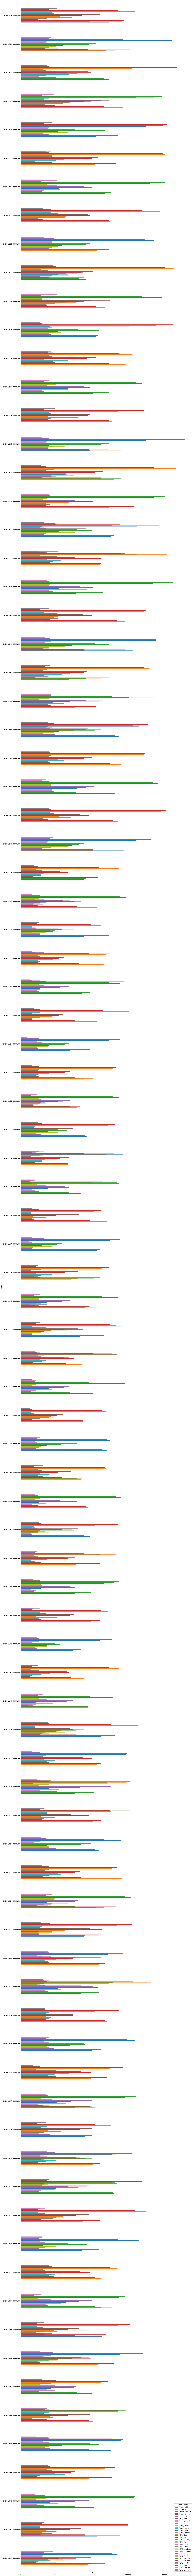

In [85]:
print("Daily sales")
dsgs.plot(kind='barh',figsize=(20,300));

Weekly sales


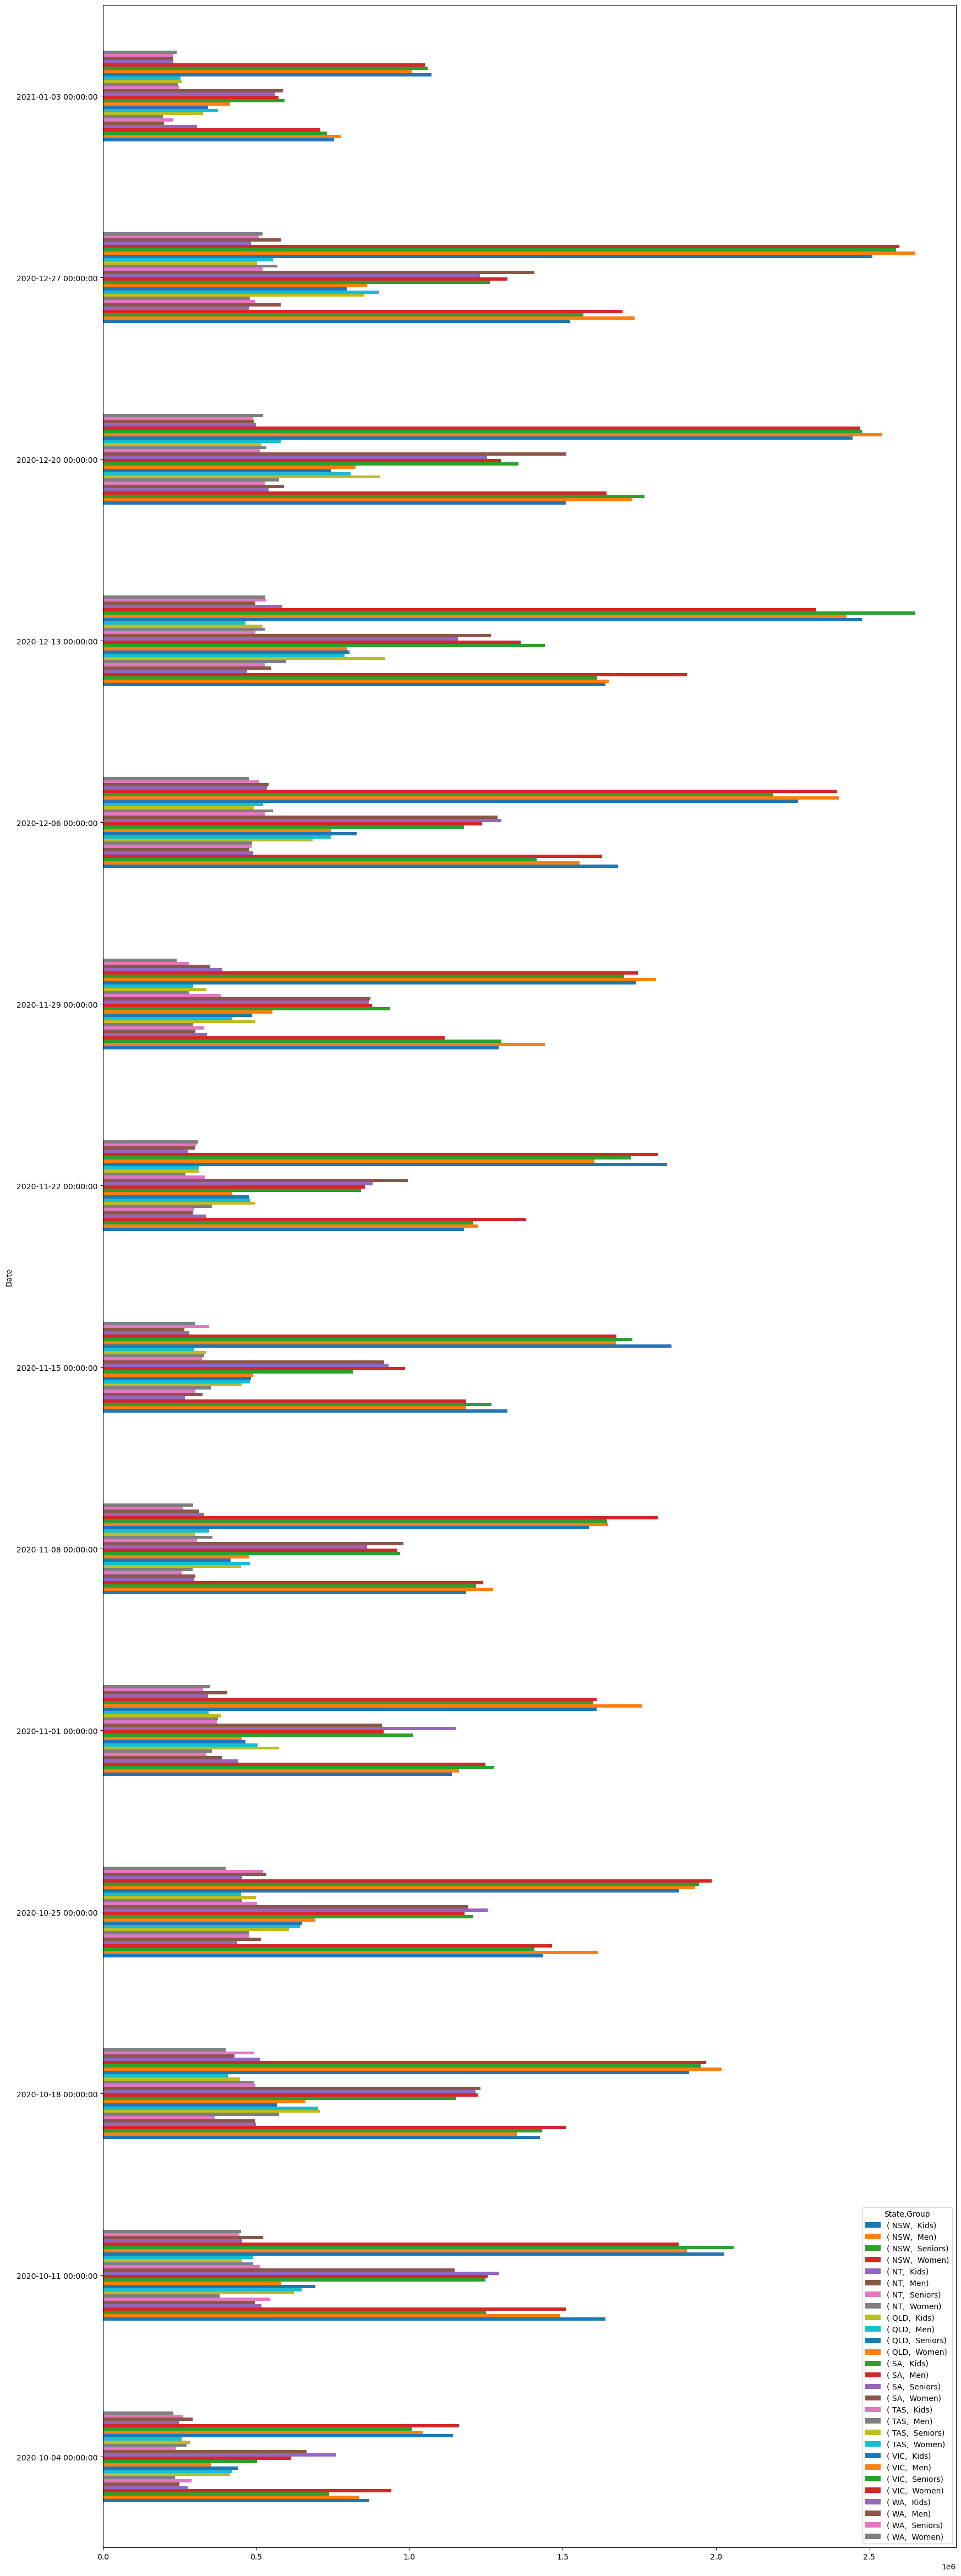

In [86]:
print("Weekly sales")
weekly_dsgs.plot(kind='barh',figsize=(20,60));

Monthly sales


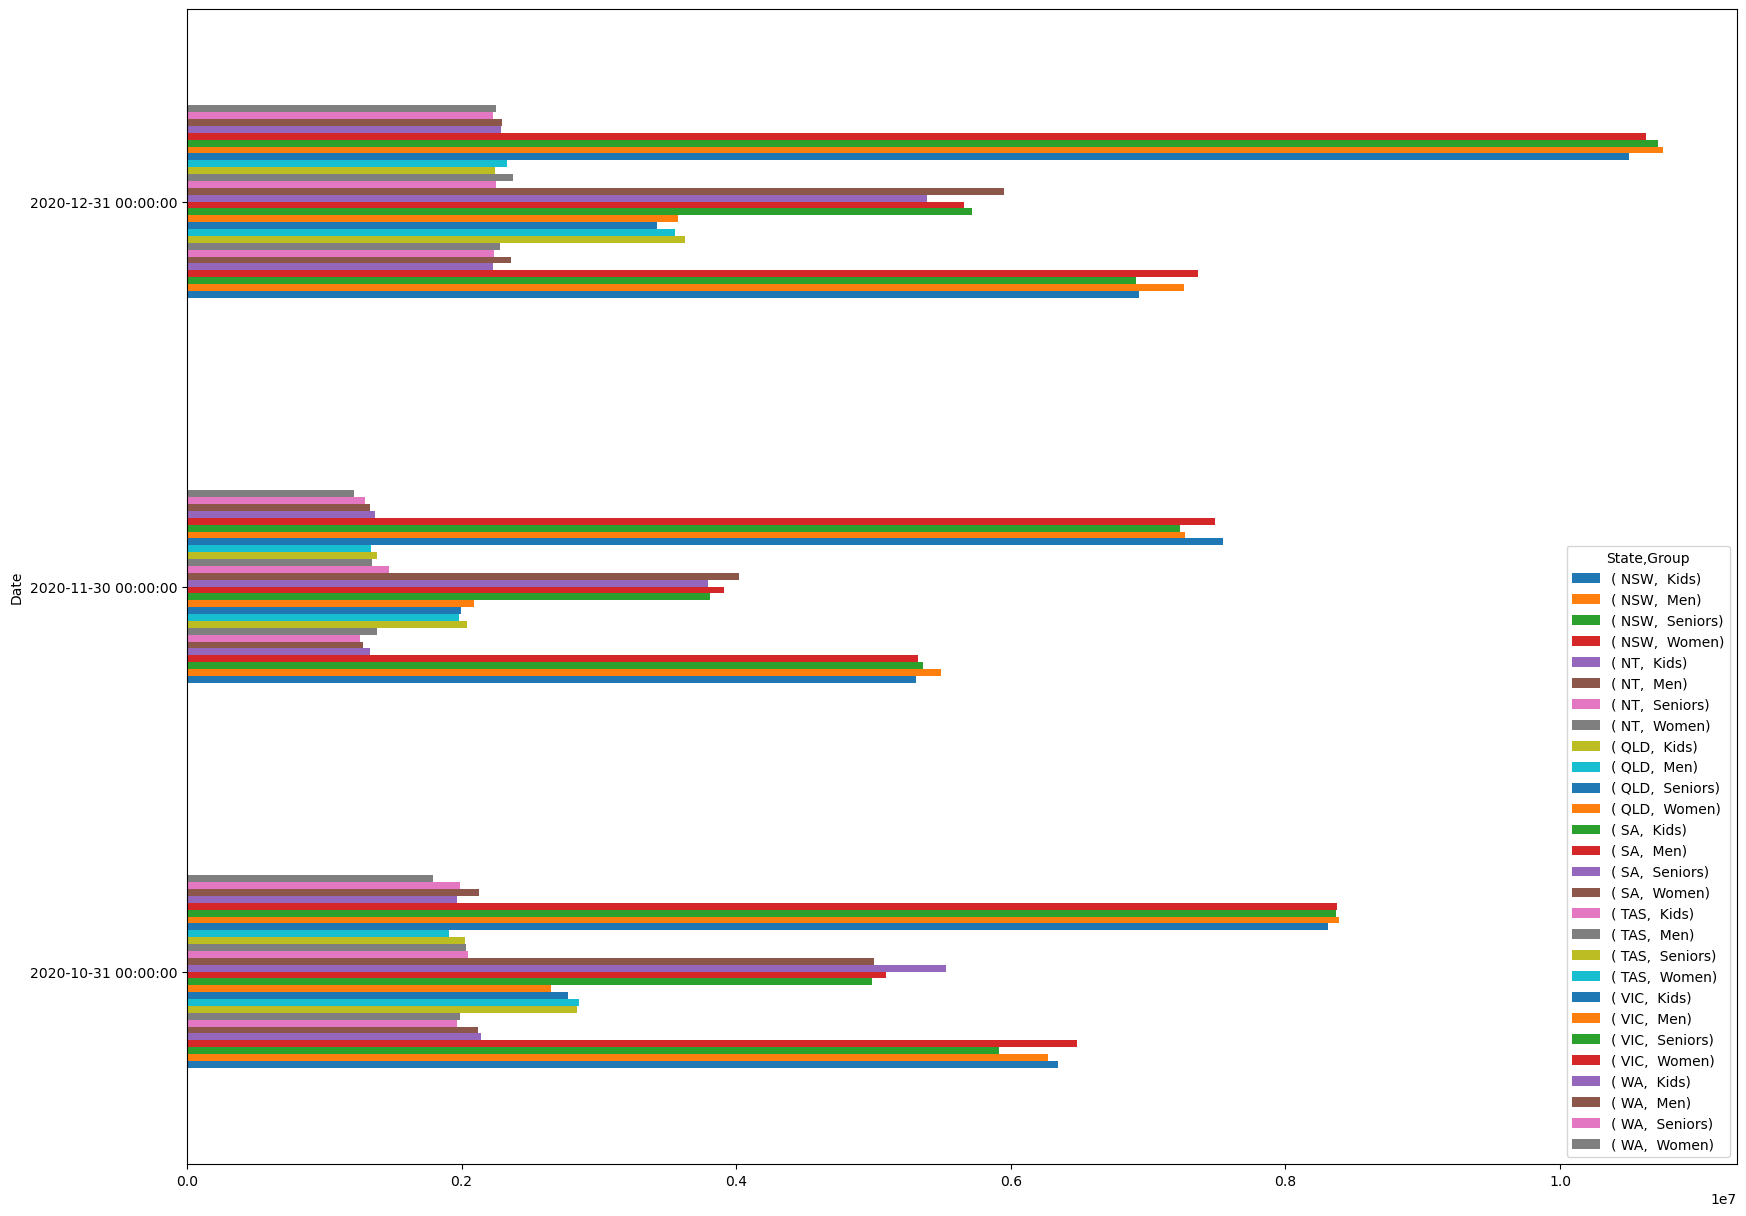

In [87]:
print("Monthly sales")
monthly_dsgs.plot(kind='barh',figsize=(20,15));

Quarterly sales


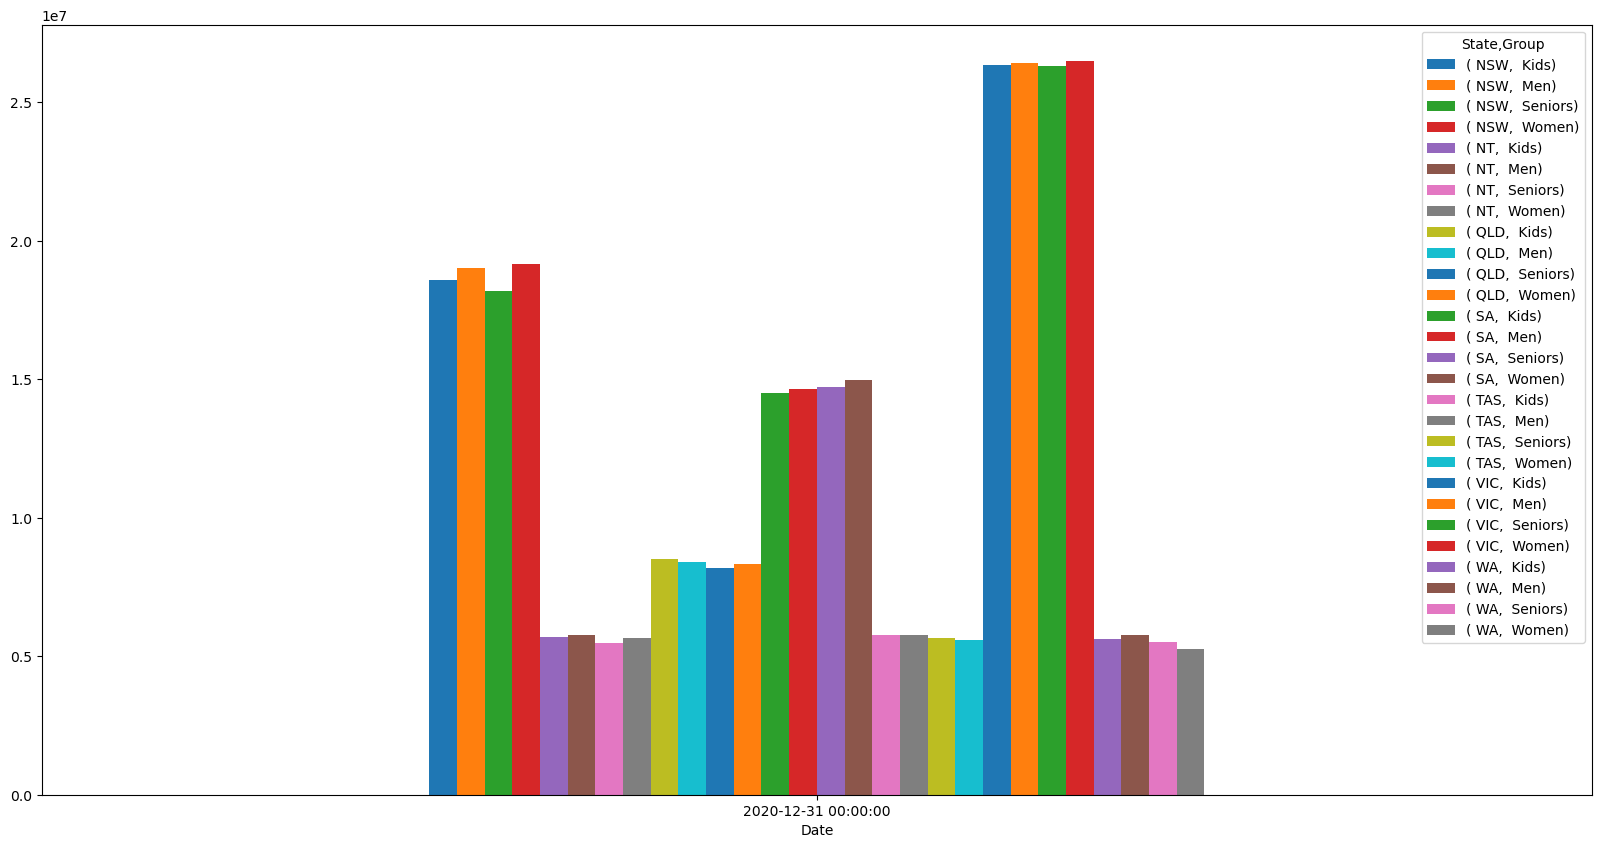

In [88]:
print("Quarterly sales")
quarterly_dsgs.plot(kind='bar',figsize=(20,10))
plt.xticks(rotation=0);

#### Time of the day analysis

In [89]:
# daily sales fot different time
time_day_analysis = df.groupby(['Date','Time'])['Sales'].sum()
tda = time_day_analysis.unstack()
print("Daily Sales")
pd.set_option('display.max_rows',None)
display(tda)
pd.reset_option('all')

Daily Sales


Time         Afternoon   Evening   Morning
Date                                      
2020-10-01     1212500   1282500   1225000
2020-10-02     1275000   1162500   1277500
2020-10-03     1137500   1297500   1455000
2020-10-04     1190000   1305000   1225000
2020-10-05     1237500   1330000   1295000
2020-10-06     1357500   1322500   1280000
2020-10-07     1212500   1260000   1240000
2020-10-08     1267500   1402500   1275000
2020-10-09     1240000   1155000   1250000
2020-10-10     1270000   1390000   1345000
2020-10-11     1232500   1225000   1415000
2020-10-12     1335000   1232500   1227500
2020-10-13     1242500   1350000   1260000
2020-10-14     1380000   1157500   1417500
2020-10-15     1330000   1137500   1312500
2020-10-16     1265000   1310000   1220000
2020-10-17     1127500   1335000   1347500
2020-10-18     1262500   1292500   1097500
2020-10-19     1365000   1250000   1345000
2020-10-20     1182500   1192500   1295000
2020-10-21     1295000   1335000   1280000
2020-10-22     1200000   1317500   1242500
2020-10-23     1252500   1007500   1402500
2020-10-24     1147500   1360000   1470000
2020-10-25     1340000   1342500   1192500
2020-10-26     1220000   1295000   1220000
2020-10-27     1210000   1207500   1300000
2020-10-28     1117500   1337500   1255000
2020-10-29     1295000   1162500   1365000
2020-10-30     1232500   1285000   1285000
2020-11-01     1000000   1025000    995000
2020-11-02     1000000    852500    872500
2020-11-03     1005000    917500    955000
2020-11-04     1170000    962500   1010000
2020-11-05     1092500    927500   1055000
2020-11-06      947500   1015000    872500
2020-11-07     1045000    962500    992500
2020-11-08     1062500    990000   1157500
2020-11-09      960000   1012500    952500
2020-11-10     1027500   1000000    965000
2020-11-11     1040000    900000    932500
2020-11-12      972500   1075000   1012500
2020-11-13     1027500    952500   1055000
2020-11-14     1097500    985000   1082500
2020-11-15     1080000   1005000   1037500
2020-11-16      922500   1030000   1042500
2020-11-17     1092500   1177500   1020000
2020-11-18      990000    945000    942500
2020-11-19      957500    885000   1062500
2020-11-20     1065000    985000    942500
2020-11-21     1072500    987500   1125000
2020-11-22      985000    902500    980000
2020-11-23     1070000   1032500    967500
2020-11-24      985000   1077500    960000
2020-11-25      977500   1092500    997500
2020-11-26      992500   1035000   1047500
2020-11-27      985000    972500   1025000
2020-11-28     1107500    912500   1005000
2020-11-29     1057500   1145000   1032500
2020-11-30      970000    982500   1082500
2020-12-01     1555000   1455000   1455000
2020-12-02     1485000   1545000   1535000
2020-12-03     1530000   1345000   1582500
2020-12-04     1580000   1485000   1417500
2020-12-05     1507500   1605000   1445000
2020-12-06     1242500   1420000   1397500
2020-12-07     1455000   1357500   1417500
2020-12-08     1567500   1450000   1562500
2020-12-09     1545000   1565000   1545000
2020-12-10     1602500   1592500   1522500
2020-12-11     1387500   1395000   1545000
2020-12-12     1425000   1465000   1520000
2020-12-13     1645000   1540000   1420000
2020-12-14     1625000   1452500   1687500
2020-12-15     1642500   1410000   1605000
2020-12-16     1475000   1422500   1537500
2020-12-17     1417500   1527500   1560000
2020-12-18     1365000   1510000   1460000
2020-12-19     1530000   1420000   1555000
2020-12-20     1565000   1380000   1507500
2020-12-21     1537500   1482500   1337500
2020-12-22     1502500   1530000   1602500
2020-12-23     1567500   1570000   1315000
2020-12-24     1535000   1522500   1525000
2020-12-25     1487500   1392500   1510000
2020-12-26     1617500   1505000   1592500
2020-12-27     1780000   1450000   1407500
2020-12-28     1635000   1545000   1415000
2020-12-29     1500000   1487500   1620000
2020-12-30     1507500   1475000   1607500

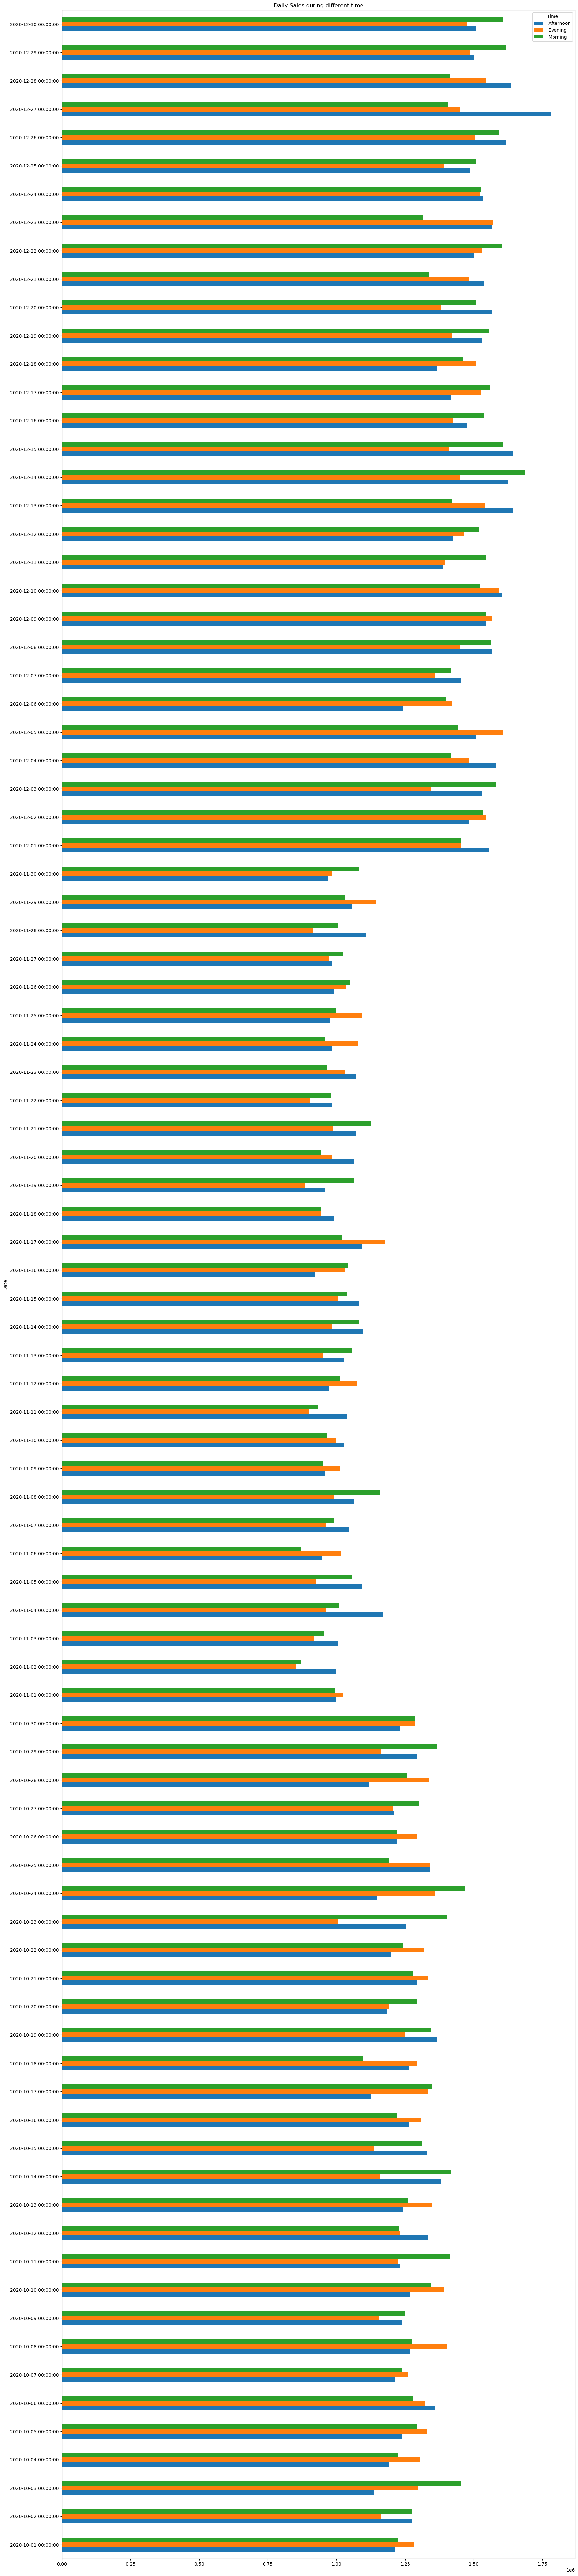

In [90]:
# plotting the daily sales during different time
tda.plot(kind='barh',figsize=(20,100))
plt.title("Daily Sales during different time");

Maximum sales recorded is during Morning on 2020-12-14, its about 1687500. Minimum sales recorded is during Evening on 2020-11-02, its about 8525000.

In [91]:
# statistical analysis
tda.describe()

Time      Afternoon       Evening       Morning
count  9.000000e+01  9.000000e+01  9.000000e+01
mean   1.266750e+06  1.245417e+06  1.268972e+06
std    2.206176e+05  2.141580e+05  2.208833e+05
min    9.225000e+05  8.525000e+05  8.725000e+05
25%    1.070625e+06  1.026250e+06  1.049375e+06
50%    1.241250e+06  1.293750e+06  1.280000e+06
75%    1.482500e+06  1.420000e+06  1.452500e+06
max    1.780000e+06  1.605000e+06  1.687500e+06

In [92]:
# sampling the daily sales for getting weekly sales
weekly_tda = tda.resample('W').sum()
print("Weekly sales")
weekly_tda

Weekly sales


Time         Afternoon   Evening   Morning
Date                                      
2020-10-04     4815000   5047500   5182500
2020-10-11     8817500   9085000   9100000
2020-10-18     8942500   8815000   8882500
2020-10-25     8782500   8805000   9227500
2020-11-01     7075000   7312500   7420000
2020-11-08     7322500   6627500   6915000
2020-11-15     7205000   6930000   7037500
2020-11-22     7085000   6912500   7115000
2020-11-29     7175000   7267500   7035000
2020-12-06     9870000   9837500   9915000
2020-12-13    10627500  10365000  10532500
2020-12-20    10620000  10122500  10912500
2020-12-27    11027500  10452500  10290000
2021-01-03     4642500   4507500   4642500

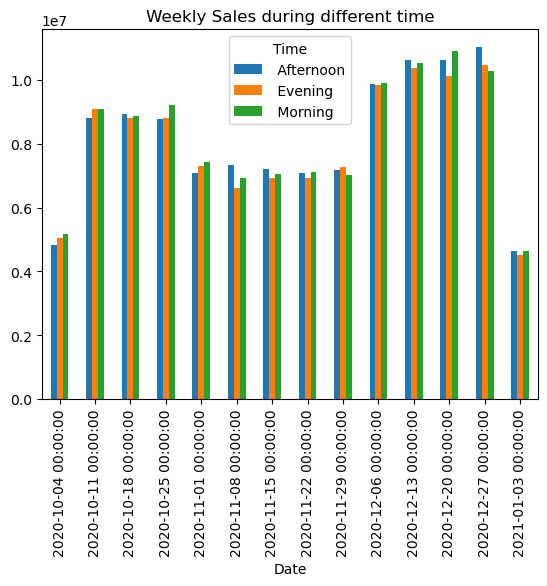

In [93]:
# plotting weekly sales during different time
weekly_tda.plot(kind='bar')
plt.title("Weekly Sales during different time");

Maximum weekly sales is recorded during Afternoon in second last week of December, its value is 11027500. The minimum weekly sales is recorded during Evening in the last week of December, its about 4507500.

In [94]:
# statistical analysis
weekly_tda.describe()

Time      Afternoon       Evening       Morning
count  1.400000e+01  1.400000e+01  1.400000e+01
mean   8.143393e+06  8.006250e+06  8.157679e+06
std    2.022820e+06  1.923812e+06  1.967439e+06
min    4.642500e+06  4.507500e+06  4.642500e+06
25%    7.107500e+06  6.916875e+06  7.035625e+06
50%    8.052500e+06  8.058750e+06  8.151250e+06
75%    9.638125e+06  9.649375e+06  9.743125e+06
max    1.102750e+07  1.045250e+07  1.091250e+07

In [95]:
print("The maximum recorded sales values for each time")
weekly_tda.max(axis=0)

The maximum recorded sales values for each time


Time
 Afternoon    11027500
 Evening      10452500
 Morning      10912500
dtype: int64

In [96]:
print("The minimum recorded sales values for each  time")
weekly_tda.min(axis=0)

The minimum recorded sales values for each  time


Time
 Afternoon    4642500
 Evening      4507500
 Morning      4642500
dtype: int64

In [97]:
# sampling the daily sales for getting monthly sales
monthly_tda = tda.resample('M').sum()
print("Monthly Sales")
monthly_tda

Monthly Sales


Time         Afternoon   Evening   Morning
Date                                      
2020-10-31    37432500  38040000  38817500
2020-11-30    30757500  29745000  30180000
2020-12-31    45817500  44302500  45210000

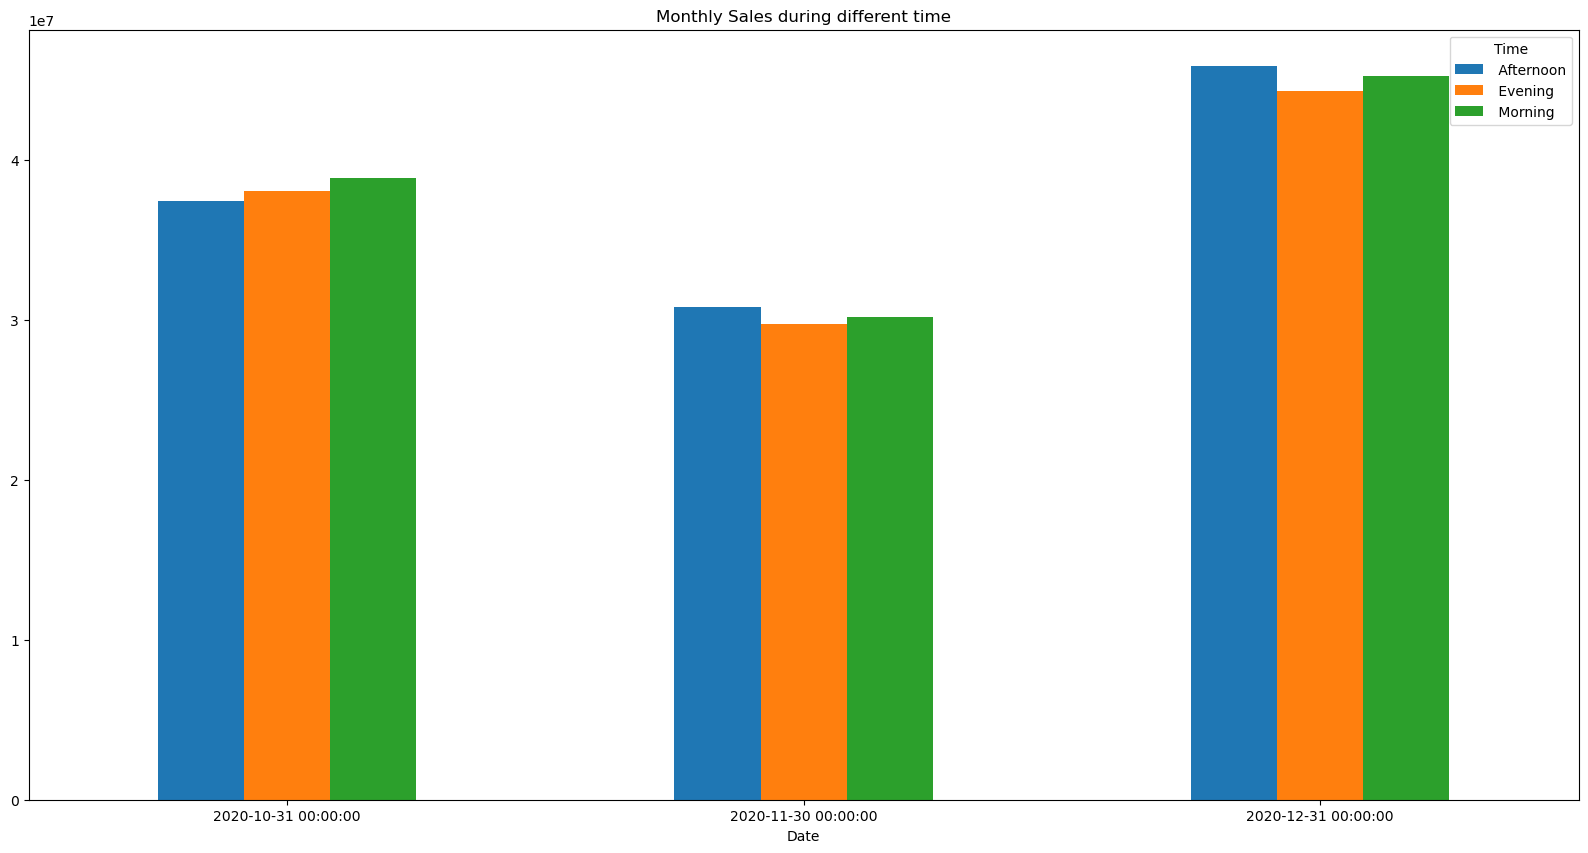

In [98]:
# plotting the daily sales during different time
monthly_tda.plot(kind='bar',figsize=(20,10))
plt.title("Monthly Sales during different time")
plt.xticks(rotation=0);

Maximum monthly sales is recorded during Afternoon in December, its about 45817500. Minimum sales is recorded during Evening in November, the value is 29745000.

In [99]:
# sampling the daily sales for getting quarterly sales
quarterly_tda = tda.resample('Q').sum()
print("Quarterly Sales")
quarterly_tda

Quarterly Sales


Time         Afternoon    Evening    Morning
Date                                        
2020-12-31   114007500  112087500  114207500

Maximum  quarterly sales is recorded during Morning among the three, its about 114207500. Minimum quarterly sales is recorded during Evening, the value is 112087500.

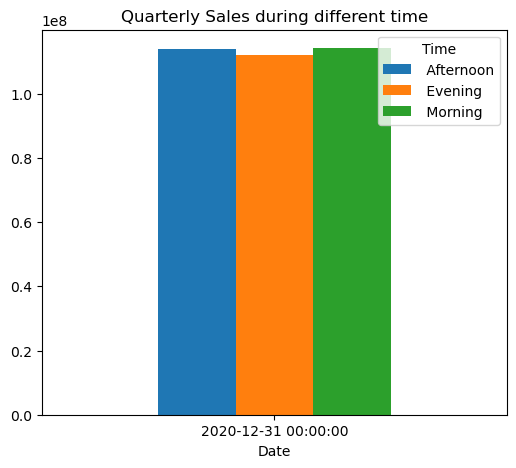

In [100]:
# plotting quarterly sales
quarterly_tda.plot(kind='bar',figsize=(6,5))
plt.title("Quarterly Sales during different time")
plt.xticks(rotation=0);

### 4. Report

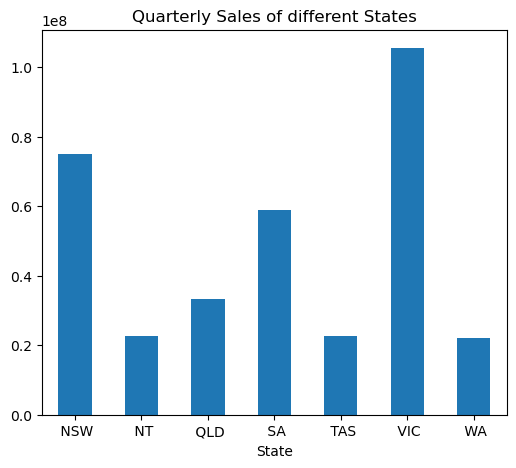

In [101]:
# plotting sales by different sates for entire quarter
state_sales.plot(kind='bar',figsize=(6,5))
plt.title("Quarterly Sales of different States")
plt.xticks(rotation=0);

From the above plot we can conclude that for the entire quarter :
* WA state generate lowest sales, the value is 22152500.
* VIC generate the highest sales, which is 105565000.

#####  Conclusions derived from differernt analysis done:
* Maximum  quarterly sales is recorded during Morning among the three time, its about 114207500. Minimum quarterly sales is recorded during Evening, the value is 112087500.
* When quarterly sales for different groups in different States where analysed Women in VIC have the maximum value,26482500.
* When quarterly sales for different groups in different States where analysed Women in WA have the minimum value,5262500.
* For the entire quarter WA state generate lowest sales, the value is 22152500 and VIC generate the highest sales, which is 105565000.

For improving the sales in WA, region specigic offers and discounts must be given. The sales of women clothing must be improved by simlilar promotions. The sales during evening can be improved by intoducing flash sales during that time.